In [1]:
#Importando as bibliotecas necessárias 
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
# Essa é a url que queremos analisar
url = 'https://levechef.com.br/Produtos-Fitness'

In [3]:
page = requests.get(url)

In [4]:
soup = BeautifulSoup(page.content, 'html.parser') 

In [5]:
rows = soup.find_all('div', class_="caption") 
rows = [row.text.strip().split("\n") for row in rows]

In [6]:
data = rows

df = pd.DataFrame(data)
df.head()

,0,1,2
0,Kit Saladas (04 saladas),0g,"R$ 59,90"
1,Kit Saladas (08 saladas),0g,"R$ 99,90"
2,Kit Semana Almoço e Jantar - 21/Out (10 Refei...,0g,"R$ 151,80"
3,Kit Semana Fit Almoço e Jantar Saladas - 21/...,0g,"R$ 145,80"
4,Kit Semana Low Carb - 14/Out (10 Refeições),0g,"R$ 139,90"


In [7]:
lst=['Prato','Peso','Preço']

In [8]:
df.columns=lst

In [9]:
df.head()

,Prato,Peso,Preço
0,Kit Saladas (04 saladas),0g,"R$ 59,90"
1,Kit Saladas (08 saladas),0g,"R$ 99,90"
2,Kit Semana Almoço e Jantar - 21/Out (10 Refei...,0g,"R$ 151,80"
3,Kit Semana Fit Almoço e Jantar Saladas - 21/...,0g,"R$ 145,80"
4,Kit Semana Low Carb - 14/Out (10 Refeições),0g,"R$ 139,90"


In [10]:
df['Fonte']="Leve Chef"

In [11]:
df['Preço'] = df['Preço'].apply(lambda x: x.strip().lstrip('R').lstrip('$'))

In [12]:
df.to_csv(r'Leve_Chef.csv',index=False,sep=';',encoding='utf-8')

In [13]:
comida=pd.read_csv('Leve_Chef.csv',sep=';')

In [14]:
comida

,Prato,Peso,Preço,Fonte
0,Kit Saladas (04 saladas),0g,"59,90",Leve Chef
1,Kit Saladas (08 saladas),0g,"99,90",Leve Chef
2,Kit Semana Almoço e Jantar - 21/Out (10 Refei...,0g,"151,80",Leve Chef
3,Kit Semana Fit Almoço e Jantar Saladas - 21/...,0g,"145,80",Leve Chef
4,Kit Semana Low Carb - 14/Out (10 Refeições),0g,"139,90",Leve Chef
5,Kit Semana Premium - 21/Out (10 Refeições),0g,"162,90",Leve Chef
6,Lagarto ao Molho Madeira (somente proteína),250g,"29,90",Leve Chef
7,Salada de Salpicão de Frango,200g,"18,90",Leve Chef
8,Salada de Tabule de Quinoa,200g,"16,90",Leve Chef
9,Salada de Arroz Negro com Frango,200g,"18,90",Leve Chef


In [15]:
leve_chef=df

In [16]:
leve_chef

,Prato,Peso,Preço,Fonte
0,Kit Saladas (04 saladas),0g,"59,90",Leve Chef
1,Kit Saladas (08 saladas),0g,"99,90",Leve Chef
2,Kit Semana Almoço e Jantar - 21/Out (10 Refei...,0g,"151,80",Leve Chef
3,Kit Semana Fit Almoço e Jantar Saladas - 21/...,0g,"145,80",Leve Chef
4,Kit Semana Low Carb - 14/Out (10 Refeições),0g,"139,90",Leve Chef
5,Kit Semana Premium - 21/Out (10 Refeições),0g,"162,90",Leve Chef
6,Lagarto ao Molho Madeira (somente proteína),250g,"29,90",Leve Chef
7,Salada de Salpicão de Frango,200g,"18,90",Leve Chef
8,Salada de Tabule de Quinoa,200g,"16,90",Leve Chef
9,Salada de Arroz Negro com Frango,200g,"18,90",Leve Chef


In [17]:
for i in range (6):
    leve_chef.drop([i], axis=0, inplace = True)

In [18]:
leve_chef.drop([55], axis=0, inplace = True)
leve_chef.drop([56], axis=0, inplace = True)

In [19]:
leve_chef.reset_index(inplace=True)
leve_chef.drop(['index'], axis=1, inplace = True)

In [20]:
def preco_editado(preco):
    a= re.sub(",",".",preco)
    b=float(a)
    return b

In [21]:
f=preco_editado('15,9')

In [22]:
type(f)

float

In [23]:
leve_chef['Preço']=leve_chef['Preço'].apply(preco_editado)

In [24]:
# abrindo csv:
ibge_tab1=pd.read_excel('tab1_1.xls')

In [25]:
ibge_tab1.head(10)
#Tabela 1.1 - Consumo alimentar médio per capita e percentual de consumo fora do domicílio em relação ao total consumido,
#por sexo, segundo os alimentos - Brasil - período 2008-2009

,Tabela 1.1 - Consumo alimentar médio per capita e percentual de consumo fora do domicílio em,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,"relação ao total consumido, por sexo, segundo ...",NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(continua),NaN,NaN,NaN,NaN,NaN,NaN
3,Alimentos,Consumo alimentar médio per capita(g/dia),NaN,NaN,Percentual de consumo fora do domicílio\nem re...,NaN,NaN
4,NaN,Total,Masculino,Feminino,Total,Masculino,Feminino
5,Arroz,160.301,189.927,132.685,12.5041,13.9353,10.5944
6,Arroz integral,8.11318,9.29937,7.00746,14.64,16.0523,12.8929
7,Preparações à base de arroz,2.4331,2.47158,2.39722,21.4883,22.3014,20.7068
8,Milho e preparações,20.3519,23.0546,17.8325,7.6051,8.59382,6.41355
9,Feijão,182.883,223.142,145.355,12.199,13.6317,10.1487


In [26]:
# Excluindo as linhas extras do início, mantendo apenas os dados de interesse.
for i in range (3):
    ibge_tab1.drop([i], axis=0, inplace = True)

In [27]:
ibge_tab1.reset_index(inplace=True)
ibge_tab1.drop(['index'], axis=1, inplace = True)

In [28]:
c=ibge_tab1.iloc[0]
ibge_tab1.columns=c

In [29]:
ibge_tab1.drop([0], axis=0, inplace = True)

In [30]:
lst2=['Alimentos','Consumo alimentar médio per capita(g/dia) Total','Consumo alimentar médio per capita(g/dia) Masculino',
     'Consumo alimentar médio per capita(g/dia) Feminino', 'Percentual de consumo fora do domicílio em relação ao total consumido (%) Total',
     'Percentual de consumo fora do domicílio em relação ao total consumido (%) Masculino','Percentual de consumo fora do domicílio em relação ao total consumido (%) Feminino']

In [31]:
ibge_tab1.columns=lst2

In [32]:
ibge_tab1.drop([1], axis=0, inplace = True)

In [33]:
ibge_tab1.reset_index(inplace=True)

In [34]:
ibge_tab1.drop(['index'], axis=1, inplace = True)

In [35]:
ibge_tab1.to_csv(r'ibge_tab1_1.csv',index=False,sep=';')

In [36]:
ibge_tab1.head()

,Alimentos,Consumo alimentar médio per capita(g/dia) Total,Consumo alimentar médio per capita(g/dia) Masculino,Consumo alimentar médio per capita(g/dia) Feminino,Percentual de consumo fora do domicílio em relação ao total consumido (%) Total,Percentual de consumo fora do domicílio em relação ao total consumido (%) Masculino,Percentual de consumo fora do domicílio em relação ao total consumido (%) Feminino
0,Arroz,160.301,189.927,132.685,12.5041,13.9353,10.5944
1,Arroz integral,8.11318,9.29937,7.00746,14.64,16.0523,12.8929
2,Preparações à base de arroz,2.4331,2.47158,2.39722,21.4883,22.3014,20.7068
3,Milho e preparações,20.3519,23.0546,17.8325,7.6051,8.59382,6.41355
4,Feijão,182.883,223.142,145.355,12.199,13.6317,10.1487


In [37]:
#Os 10 alimentos mais consumidos per capita:
mais_consumidos=ibge_tab1.sort_values(by = "Consumo alimentar médio per capita(g/dia) Total", ascending = False).head(10)

In [38]:
mais_consumidos

,Alimentos,Consumo alimentar médio per capita(g/dia) Total,Consumo alimentar médio per capita(g/dia) Masculino,Consumo alimentar médio per capita(g/dia) Feminino,Percentual de consumo fora do domicílio em relação ao total consumido (%) Total,Percentual de consumo fora do domicílio em relação ao total consumido (%) Masculino,Percentual de consumo fora do domicílio em relação ao total consumido (%) Feminino
4,Feijão,182.883,223.142,145.355,12.199,13.6317,10.1487
0,Arroz,160.301,189.927,132.685,12.5041,13.9353,10.5944
50,Carne bovina,63.2433,73.5366,53.6483,16.5699,18.603,13.972
43,Pão de sal,53.0194,58.0894,48.2932,9.10374,9.7649,8.36241
53,Aves,36.5124,40.0951,33.1726,16.9595,18.5706,15.1442
42,Macarrão e preparações à base de macarrão,36.3317,40.3409,32.5944,15.5096,17.7256,12.953
55,Peixes frescos e preparações,23.4063,26.2545,20.7513,10.849,11.4626,10.1252
27,Laranja,20.5763,20.431,20.7117,16.2652,17.9125,14.7505
3,Milho e preparações,20.3519,23.0546,17.8325,7.6051,8.59382,6.41355
26,Banana,18.5738,18.3341,18.7972,11.6464,12.4005,10.9607


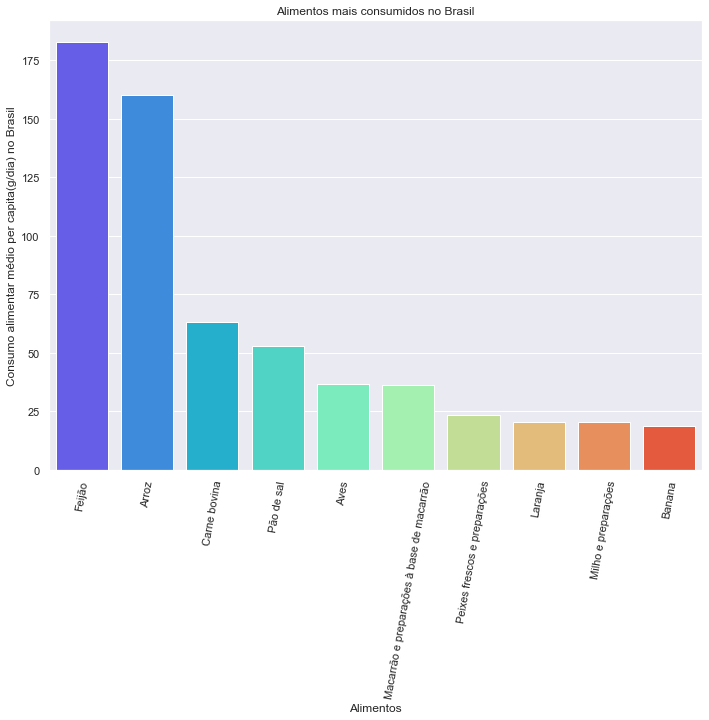

In [39]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
g=sns.barplot(x='Alimentos',y='Consumo alimentar médio per capita(g/dia) Total',data=mais_consumidos,palette='rainbow').set(
             title='Alimentos mais consumidos no Brasil')
plt.xticks(rotation=80)

plt.xlabel("Alimentos")
plt.ylabel("Consumo alimentar médio per capita(g/dia) no Brasil")

plt.savefig('Consumo alimentar médio per capita no Brasil')

In [40]:
#Os 10 alimentos menos consumidos per capita:
menos_consumidos = ibge_tab1.sort_values(by = "Consumo alimentar médio per capita(g/dia) Total", ascending = True).head(10)

''

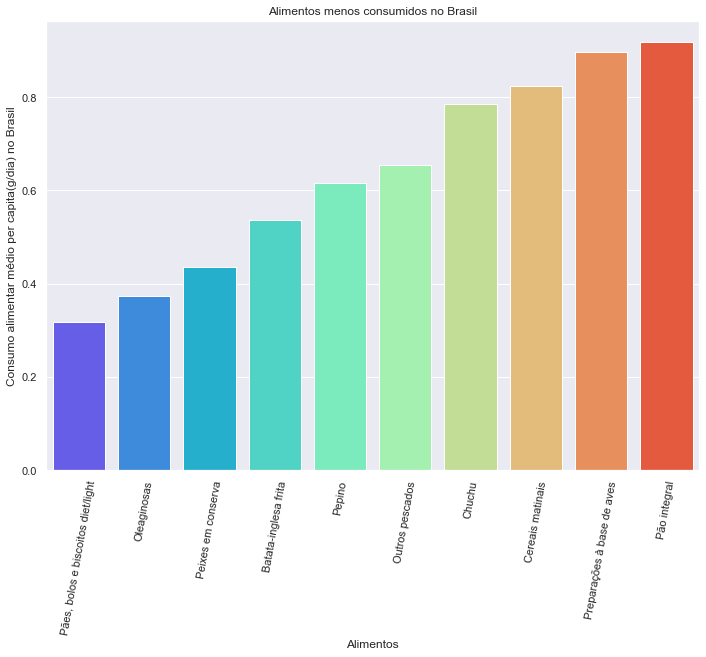

In [41]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Alimentos',y='Consumo alimentar médio per capita(g/dia) Total',data=menos_consumidos,palette='rainbow').set(
             title='Alimentos menos consumidos no Brasil')
plt.xticks(rotation=80)
plt.xlabel("Alimentos")
plt.ylabel("Consumo alimentar médio per capita(g/dia) no Brasil")
;

In [42]:
#Os 10 alimentos mais consumidos fora do domicílio:
mais_fora= ibge_tab1.sort_values(by = 'Percentual de consumo fora do domicílio em relação ao total consumido (%) Total', ascending = False).head(10)

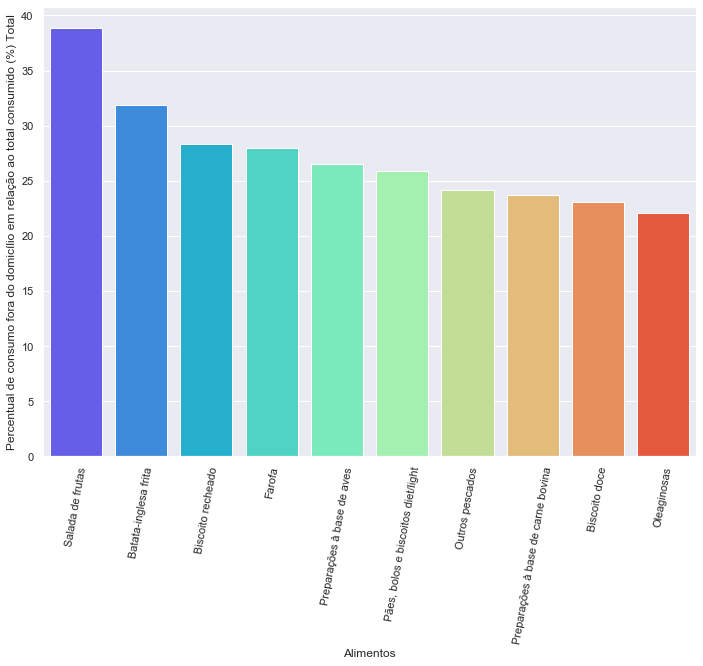

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Alimentos',y='Percentual de consumo fora do domicílio em relação ao total consumido (%) Total',data=mais_fora
           ,palette='rainbow')
plt.xticks(rotation=80);

In [44]:
#Os 10 alimentos menos consumidos fora do domicílio:
menos_fora=ibge_tab1.sort_values(by = 'Percentual de consumo fora do domicílio em relação ao total consumido (%) Total', ascending = True).head(10)

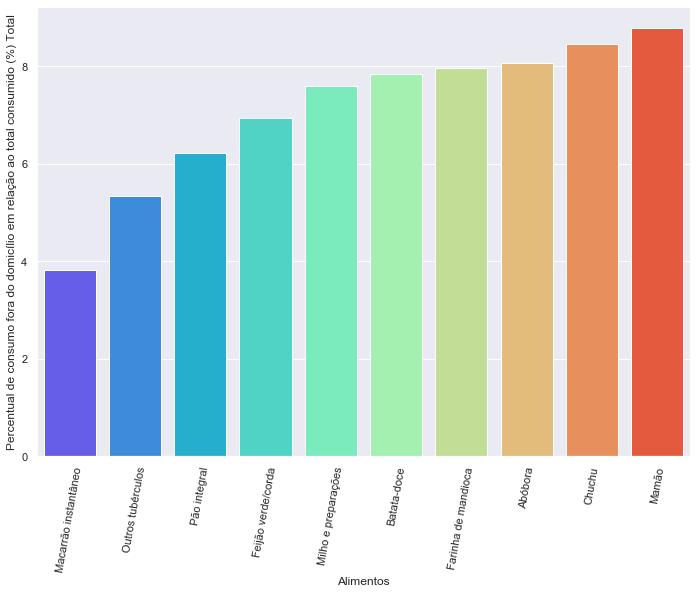

In [45]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Alimentos',y='Percentual de consumo fora do domicílio em relação ao total consumido (%) Total',data=menos_fora
           ,palette='rainbow')
plt.xticks(rotation=80);

In [46]:
# abrindo csv:
ibge_tab1_5=pd.read_excel('tab1_5.xls')
#Tabela 1.5 - Percentual de consumo alimentar fora do domicílio em relação ao total consumido, por Grandes Regiões, 
#segundo os alimentos - Brasil - período 2008-2009

In [47]:
ibge_tab1_5.head(10)

,"Tabela 1.5 - Percentual de consumo alimentar fora do domicílio em relação ao total consumido,",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,"por Grandes Regiões, segundo os alimentos - Br...",NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,(continua),NaN,NaN,NaN,NaN,NaN
3,Alimentos,Percentual de consumo alimentar fora do domicí...,NaN,NaN,NaN,NaN
4,NaN,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
5,Arroz,11.6652,10.6132,13.3356,13.6774,12.3907
6,Arroz integral,9.48052,13.3167,16.3683,18.2137,20.5998
7,Preparações à base de arroz,34.5046,14.7784,32.2175,12.2562,22.4184
8,Milho e preparações,6.11622,4.83796,12.9315,17.3344,14.3319
9,Feijão,12.2546,10.0508,12.9622,13.1072,12.0739


In [48]:
# Excluindo as linhas extras do início, mantendo apenas os dados de interesse.
for i in range (5):
    ibge_tab1_5.drop([i], axis=0, inplace = True)

In [49]:
ibge_tab1_5.head()

,"Tabela 1.5 - Percentual de consumo alimentar fora do domicílio em relação ao total consumido,",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
5,Arroz,11.6652,10.6132,13.3356,13.6774,12.3907
6,Arroz integral,9.48052,13.3167,16.3683,18.2137,20.5998
7,Preparações à base de arroz,34.5046,14.7784,32.2175,12.2562,22.4184
8,Milho e preparações,6.11622,4.83796,12.9315,17.3344,14.3319
9,Feijão,12.2546,10.0508,12.9622,13.1072,12.0739


In [50]:
lst3=['Alimentos', 'Norte [%]','Nordeste [%]','Sudeste [%]','Sul [%]','Centro-Oeste [%]']

In [51]:
ibge_tab1_5.columns=lst3

In [52]:
ibge_tab1_5.reset_index(inplace=True)

In [53]:
ibge_tab1_5.drop(['index'], axis=1, inplace = True)

In [54]:
ibge_tab1_5.to_csv(r'ibge_tab1_5.csv',index=False,sep=';')

In [55]:
ibge_tab1_5.head()

,Alimentos,Norte [%],Nordeste [%],Sudeste [%],Sul [%],Centro-Oeste [%]
0,Arroz,11.6652,10.6132,13.3356,13.6774,12.3907
1,Arroz integral,9.48052,13.3167,16.3683,18.2137,20.5998
2,Preparações à base de arroz,34.5046,14.7784,32.2175,12.2562,22.4184
3,Milho e preparações,6.11622,4.83796,12.9315,17.3344,14.3319
4,Feijão,12.2546,10.0508,12.9622,13.1072,12.0739


In [56]:
ibge_tab1_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
Alimentos           53 non-null object
Norte [%]           53 non-null object
Nordeste [%]        53 non-null object
Sudeste [%]         53 non-null object
Sul [%]             53 non-null object
Centro-Oeste [%]    53 non-null object
dtypes: object(6)
memory usage: 2.6+ KB


In [57]:
#Os 10 alimentos mais consumidos na região norte: FORA DO DOMICÍLIO
mais_norte_fora_domicilio = ibge_tab1_5.sort_values(by = "Norte [%]", ascending = False).head(10)

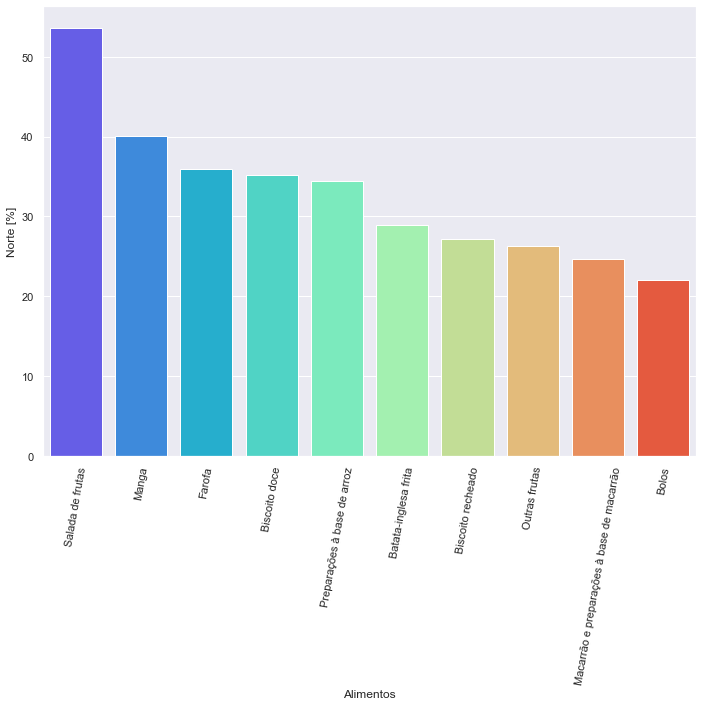

In [58]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Alimentos',y='Norte [%]',data=mais_norte_fora_domicilio,palette='rainbow')
plt.xticks(rotation=80);

In [59]:
#Os 10 alimentos menos consumidos na região norte: FORA DO DOMICÍLIO
menos_norte_fora_domicilio = ibge_tab1_5.sort_values(by = "Norte [%]", ascending = True).head(10)

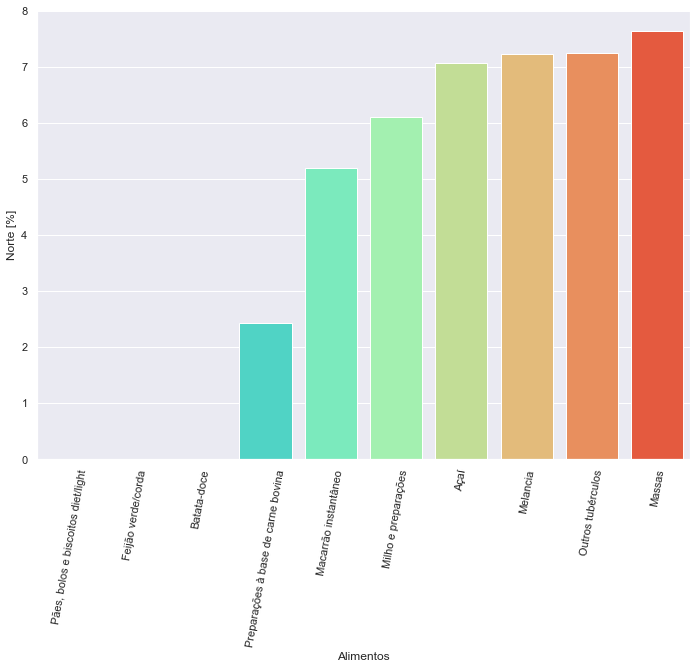

In [60]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Alimentos',y='Norte [%]',data=menos_norte_fora_domicilio,palette='rainbow')
plt.xticks(rotation=80);

In [61]:
#Os 10 alimentos mais consumidos na região nordeste: FORA DO DOMICÍLIO
mais_nordeste_fora_domicilio = ibge_tab1_5.sort_values(by = "Nordeste [%]", ascending = False).head(10)

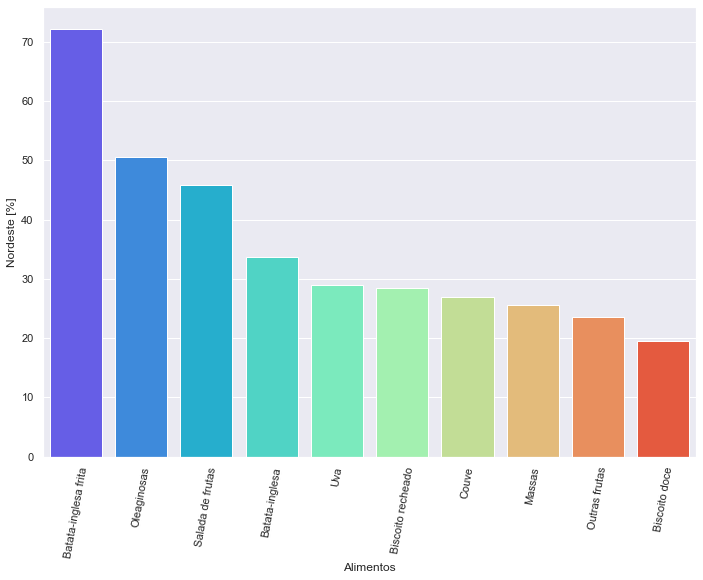

In [62]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Alimentos',y='Nordeste [%]',data=mais_nordeste_fora_domicilio,palette='rainbow')
plt.xticks(rotation=80);

In [63]:
#Os 10 alimentos menos consumidos na região nordeste: FORA DO DOMICÍLIO
menos_nordeste_fora_domicilio = ibge_tab1_5.sort_values(by = "Nordeste [%]", ascending = True).head(10)

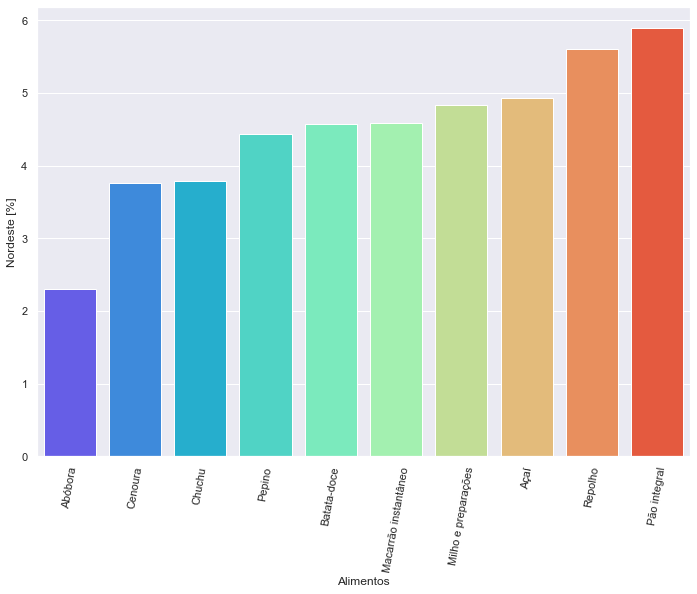

In [64]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Alimentos',y='Nordeste [%]',data=menos_nordeste_fora_domicilio,palette='rainbow')
plt.xticks(rotation=80);

In [65]:
#Os 10 alimentos mais consumidos na região sudeste: FORA DO DOMICÍLIO
mais_sudeste_fora_domicilio = ibge_tab1_5.sort_values(by = "Sudeste [%]", ascending = False).head(10)

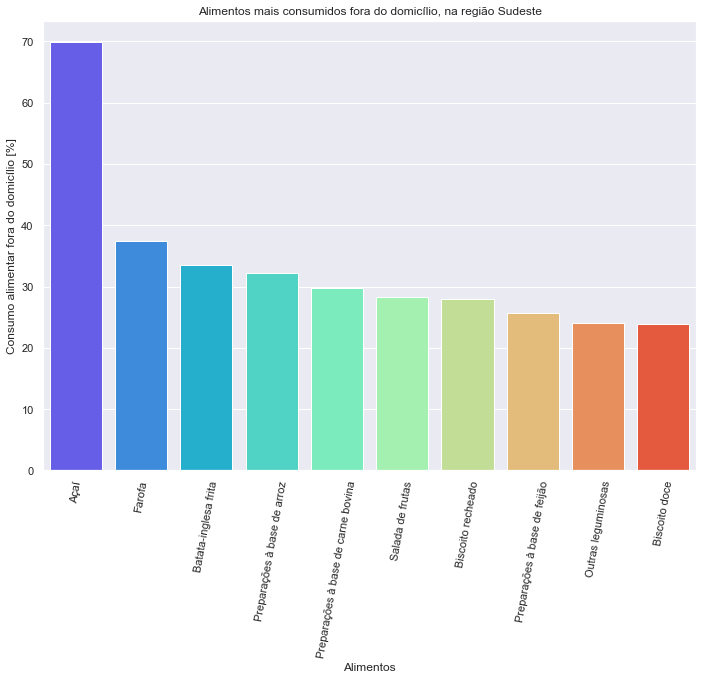

In [66]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Alimentos',y='Sudeste [%]',data=mais_sudeste_fora_domicilio,palette='rainbow').set(
             title='Alimentos mais consumidos fora do domicílio, na região Sudeste')
plt.xlabel("Alimentos")
plt.ylabel("Consumo alimentar fora do domicílio [%]")
plt.xticks(rotation=80);

In [67]:
#Os 10 alimentos menos consumidos na região sudeste: FORA DO DOMICÍLIO
menos_sudeste_fora_domicilio = ibge_tab1_5.sort_values(by = "Sudeste [%]", ascending = True).head(10)

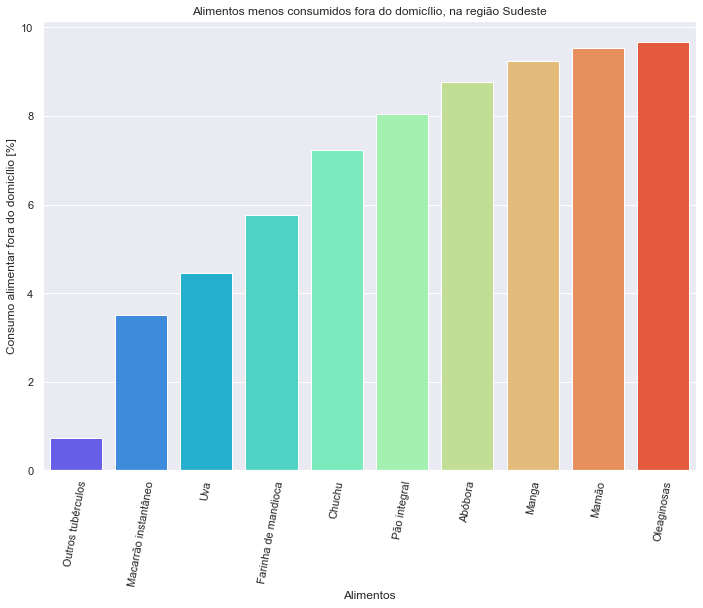

In [68]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Alimentos',y='Sudeste [%]',data=menos_sudeste_fora_domicilio,palette='rainbow').set(
             title='Alimentos menos consumidos fora do domicílio, na região Sudeste')
plt.xlabel("Alimentos")
plt.ylabel("Consumo alimentar fora do domicílio [%]")
plt.xticks(rotation=80);

In [69]:
#Os 10 alimentos mais consumidos: FORA DO DOMICÍLIO
mais_sul_fora_domicilio= ibge_tab1_5.sort_values(by = "Sul [%]", ascending = False).head(10)
mais_centrooeste_fora_domicilio= ibge_tab1_5.sort_values(by = "Centro-Oeste [%]", ascending = False).head(10)

In [70]:
mais_nordeste_fora_domicilio

,Alimentos,Norte [%],Nordeste [%],Sudeste [%],Sul [%],Centro-Oeste [%]
21,Batata-inglesa frita,28.9779,72.2483,33.5039,19.4087,25.2762
36,Oleaginosas,9.86556,50.5835,9.66201,11.841,20.4338
34,Salada de frutas,53.6427,45.8782,28.3554,37.8127,54.4874
20,Batata-inglesa,14.464,33.6494,17.8198,17.6527,24.2274
33,Uva,17.3582,28.9922,4.45461,12.8675,2.40343
48,Biscoito recheado,27.139,28.4508,27.9788,30.5539,22.0005
9,Couve,19.1554,26.9698,15.0833,12.502,30.1297
40,Massas,7.64039,25.6533,16.9513,10.9486,27.9492
35,Outras frutas,26.3381,23.6434,11.8206,8.54196,11.8382
46,Biscoito doce,35.1683,19.6026,23.9565,25.0999,16.5942


In [71]:
mais_norte_fora_domicilio

,Alimentos,Norte [%],Nordeste [%],Sudeste [%],Sul [%],Centro-Oeste [%]
34,Salada de frutas,53.6427,45.8782,28.3554,37.8127,54.4874
30,Manga,40.067,16.7661,9.23001,11.9994,9.7018
38,Farofa,35.896,17.8619,37.4059,17.7022,20.4586
46,Biscoito doce,35.1683,19.6026,23.9565,25.0999,16.5942
2,Preparações à base de arroz,34.5046,14.7784,32.2175,12.2562,22.4184
21,Batata-inglesa frita,28.9779,72.2483,33.5039,19.4087,25.2762
48,Biscoito recheado,27.139,28.4508,27.9788,30.5539,22.0005
35,Outras frutas,26.3381,23.6434,11.8206,8.54196,11.8382
42,Macarrão e preparações à base de macarrão,24.6785,16.8424,13.2167,15.627,15.1293
45,Bolos,22.069,16.6685,13.0352,12.7419,10.6704


In [72]:
mais_sudeste_fora_domicilio

,Alimentos,Norte [%],Nordeste [%],Sudeste [%],Sul [%],Centro-Oeste [%]
25,Açaí,7.07739,4.93361,69.8589,0,100
38,Farofa,35.896,17.8619,37.4059,17.7022,20.4586
21,Batata-inglesa frita,28.9779,72.2483,33.5039,19.4087,25.2762
2,Preparações à base de arroz,34.5046,14.7784,32.2175,12.2562,22.4184
51,Preparações à base de carne bovina,2.42955,15.4439,29.7275,21.7453,15.4894
34,Salada de frutas,53.6427,45.8782,28.3554,37.8127,54.4874
48,Biscoito recheado,27.139,28.4508,27.9788,30.5539,22.0005
6,Preparações à base de feijão,15.68,11.2958,25.6308,11.9556,14.4311
7,Outras leguminosas,9.70416,5.91755,24.0856,11.1005,40.643
46,Biscoito doce,35.1683,19.6026,23.9565,25.0999,16.5942


In [73]:
mais_centrooeste_fora_domicilio

,Alimentos,Norte [%],Nordeste [%],Sudeste [%],Sul [%],Centro-Oeste [%]
25,Açaí,7.07739,4.93361,69.8589,0,100
34,Salada de frutas,53.6427,45.8782,28.3554,37.8127,54.4874
7,Outras leguminosas,9.70416,5.91755,24.0856,11.1005,40.643
32,Tangerina,13.9717,11.9117,14.8307,14.9623,34.6552
12,Outras verduras,10.0081,18.6201,11.8498,21.5664,33.123
19,Batata-doce,0,4.57078,12.8846,12.4039,30.7721
9,Couve,19.1554,26.9698,15.0833,12.502,30.1297
49,"Pães, bolos e biscoitos diet/light",0,7.38911,23.5363,48.272,28.9893
18,Outros legumes,9.84189,10.1037,9.99492,16.6424,28.2204
40,Massas,7.64039,25.6533,16.9513,10.9486,27.9492


In [74]:
mais_sul_fora_domicilio

,Alimentos,Norte [%],Nordeste [%],Sudeste [%],Sul [%],Centro-Oeste [%]
49,"Pães, bolos e biscoitos diet/light",0,7.38911,23.5363,48.272,28.9893
34,Salada de frutas,53.6427,45.8782,28.3554,37.8127,54.4874
31,Melancia,7.24225,10.6225,13.3097,34.4932,14.7677
48,Biscoito recheado,27.139,28.4508,27.9788,30.5539,22.0005
39,Cereais matinais,15.1558,14.1621,21.0313,26.4349,13.9689
24,Abacaxi,15.3826,6.60028,14.9637,25.2152,24.9155
46,Biscoito doce,35.1683,19.6026,23.9565,25.0999,16.5942
47,Biscoito salgado,16.394,9.55216,20.9906,23.3811,15.7631
14,Cenoura,17.9365,3.75739,20.5633,22.1116,22.7379
51,Preparações à base de carne bovina,2.42955,15.4439,29.7275,21.7453,15.4894


In [75]:
#Os 10 alimentos menos consumidos: FORA DO DOMICÍLIO
menos_norte_fora_domicilio

,Alimentos,Norte [%],Nordeste [%],Sudeste [%],Sul [%],Centro-Oeste [%]
49,"Pães, bolos e biscoitos diet/light",0,7.38911,23.5363,48.272,28.9893
5,Feijão verde/corda,0,7.10582,9.67271,0,0
19,Batata-doce,0,4.57078,12.8846,12.4039,30.7721
51,Preparações à base de carne bovina,2.42955,15.4439,29.7275,21.7453,15.4894
41,Macarrão instantâneo,5.20033,4.58988,3.51893,5.64635,0.232245
3,Milho e preparações,6.11622,4.83796,12.9315,17.3344,14.3319
25,Açaí,7.07739,4.93361,69.8589,0,100
31,Melancia,7.24225,10.6225,13.3097,34.4932,14.7677
23,Outros tubérculos,7.24549,8.24763,0.731822,0,1.75566
40,Massas,7.64039,25.6533,16.9513,10.9486,27.9492


In [76]:
menos_nordeste_fora_domicilio

,Alimentos,Norte [%],Nordeste [%],Sudeste [%],Sul [%],Centro-Oeste [%]
13,Abóbora,16.0984,2.3081,8.7656,20.5525,7.46226
14,Cenoura,17.9365,3.75739,20.5633,22.1116,22.7379
15,Chuchu,20.8753,3.79347,7.22703,12.7147,8.8411
16,Pepino,21.1221,4.43127,16.5143,12.7526,23.7087
19,Batata-doce,0,4.57078,12.8846,12.4039,30.7721
41,Macarrão instantâneo,5.20033,4.58988,3.51893,5.64635,0.232245
3,Milho e preparações,6.11622,4.83796,12.9315,17.3344,14.3319
25,Açaí,7.07739,4.93361,69.8589,0,100
10,Repolho,14.9128,5.60746,21.0361,15.2309,7.89189
44,Pão integral,11.4934,5.89138,8.04172,2.93446,10.2537


In [77]:
menos_sudeste_fora_domicilio

,Alimentos,Norte [%],Nordeste [%],Sudeste [%],Sul [%],Centro-Oeste [%]
23,Outros tubérculos,7.24549,8.24763,0.731822,0,1.75566
41,Macarrão instantâneo,5.20033,4.58988,3.51893,5.64635,0.232245
33,Uva,17.3582,28.9922,4.45461,12.8675,2.40343
37,Farinha de mandioca,8.6752,7.26374,5.75444,8.09104,24.9503
15,Chuchu,20.8753,3.79347,7.22703,12.7147,8.8411
44,Pão integral,11.4934,5.89138,8.04172,2.93446,10.2537
13,Abóbora,16.0984,2.3081,8.7656,20.5525,7.46226
30,Manga,40.067,16.7661,9.23001,11.9994,9.7018
29,Mamão,13.6234,7.94784,9.54345,7.48652,6.41936
36,Oleaginosas,9.86556,50.5835,9.66201,11.841,20.4338


In [78]:
menos_sul_fora_domicilio= ibge_tab1_5.sort_values(by = "Sul [%]", ascending = True).head(10)
menos_centrooeste_fora_domicilio= ibge_tab1_5.sort_values(by = "Centro-Oeste [%]", ascending = True).head(10)

In [79]:
menos_sul_fora_domicilio

,Alimentos,Norte [%],Nordeste [%],Sudeste [%],Sul [%],Centro-Oeste [%]
23,Outros tubérculos,7.24549,8.24763,0.731822,0,1.75566
5,Feijão verde/corda,0,7.10582,9.67271,0,0
25,Açaí,7.07739,4.93361,69.8589,0,100
44,Pão integral,11.4934,5.89138,8.04172,2.93446,10.2537
41,Macarrão instantâneo,5.20033,4.58988,3.51893,5.64635,0.232245
29,Mamão,13.6234,7.94784,9.54345,7.48652,6.41936
43,Pão de sal,8.45564,6.99323,11.0768,7.63532,10.2023
37,Farinha de mandioca,8.6752,7.26374,5.75444,8.09104,24.9503
35,Outras frutas,26.3381,23.6434,11.8206,8.54196,11.8382
40,Massas,7.64039,25.6533,16.9513,10.9486,27.9492


In [80]:
menos_centrooeste_fora_domicilio

,Alimentos,Norte [%],Nordeste [%],Sudeste [%],Sul [%],Centro-Oeste [%]
5,Feijão verde/corda,0,7.10582,9.67271,0,0
41,Macarrão instantâneo,5.20033,4.58988,3.51893,5.64635,0.232245
23,Outros tubérculos,7.24549,8.24763,0.731822,0,1.75566
33,Uva,17.3582,28.9922,4.45461,12.8675,2.40343
29,Mamão,13.6234,7.94784,9.54345,7.48652,6.41936
13,Abóbora,16.0984,2.3081,8.7656,20.5525,7.46226
10,Repolho,14.9128,5.60746,21.0361,15.2309,7.89189
15,Chuchu,20.8753,3.79347,7.22703,12.7147,8.8411
52,Carne suína,14.8475,16.2821,19.9707,14.8088,9.53406
26,Banana,11.2319,9.83337,12.8138,12.7325,9.54241


In [81]:
#função: 
def ibge (dataframe):
    dataframe.reset_index(inplace=True)
    dataframe.drop(['index'], axis=1, inplace = True)
    column_name=dataframe.iloc[0]
    dataframe.columns=column_name
    dataframe.drop([0], axis=0, inplace = True)

In [82]:
# abrindo csv:
ibge_tab1_4=pd.read_excel('tab1_4.xls')
#Tabela 1.4 - Prevalência de consumo alimentar e consumo alimentar médio per capita, por Grandes Regiões, segundo os 
#alimentos - Brasil - período 2008-2009

In [83]:
# Excluindo as linhas extras do início, mantendo apenas os dados de interesse.
for i in range (3):
    ibge_tab1_4.drop([i], axis=0, inplace = True)

In [84]:
ibge(ibge_tab1_4)

In [85]:
lst10=['Alimentos', 'Prevalência de consumo alimentar (%) Norte', 'Prevalência de consumo alimentar (%) Norte','Prevalência de consumo alimentar (%) Norte','Prevalência de consumo alimentar (%) Norte','Prevalência de consumo alimentar (%) Norte',
      'Consumo alimentar médio per capita (g/dia) Norte','Consumo alimentar médio per capita (g/dia) Nordeste','Consumo alimentar médio per capita (g/dia) Sudeste',
      'Consumo alimentar médio per capita (g/dia) Sul','Consumo alimentar médio per capita (g/dia) Centro-Oeste']

In [86]:
ibge_tab1_4.columns=lst10

In [87]:
ibge_tab1_4.head()

,Alimentos,Prevalência de consumo alimentar (%) Norte,Prevalência de consumo alimentar (%) Norte,Prevalência de consumo alimentar (%) Norte,Prevalência de consumo alimentar (%) Norte,Prevalência de consumo alimentar (%) Norte,Consumo alimentar médio per capita (g/dia) Norte,Consumo alimentar médio per capita (g/dia) Nordeste,Consumo alimentar médio per capita (g/dia) Sudeste,Consumo alimentar médio per capita (g/dia) Sul,Consumo alimentar médio per capita (g/dia) Centro-Oeste
1,NaN,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
2,Arroz,76.9317,80.2563,88.4826,78.5345,89.7801,156.564,142.565,175.616,133.846,194.537
3,Arroz integral,8.11151,4.58643,2.47041,2.59113,5.22286,19.4074,9.79939,6.073,3.70733,10.914
4,Preparações à base de arroz,1.19271,0.660806,1.21784,3.32334,1.52503,2.20121,1.40905,1.83271,6.04481,2.80034
5,Milho e preparações,6.26905,28.8857,6.72978,7.73331,6.8626,8.05914,50.9072,7.3864,12.8053,9.23142


In [88]:
ibge_tab1_4.drop(['Prevalência de consumo alimentar (%) Norte'], axis=1, inplace = True)

In [89]:
ibge_tab1_4.drop([1], axis=0, inplace = True)

In [90]:
ibge_tab1_4.reset_index(inplace=True)
ibge_tab1_4.drop(['index'], axis=1, inplace = True)

In [91]:
ibge_tab1_4.to_csv(r'ibge_tab1_4.csv',index=False,sep=';')

In [92]:
#Os 10 alimentos mais consumidos na região norte (per capita)
mais_norte = ibge_tab1_4.sort_values(by = "Consumo alimentar médio per capita (g/dia) Norte", ascending = False).head(10)

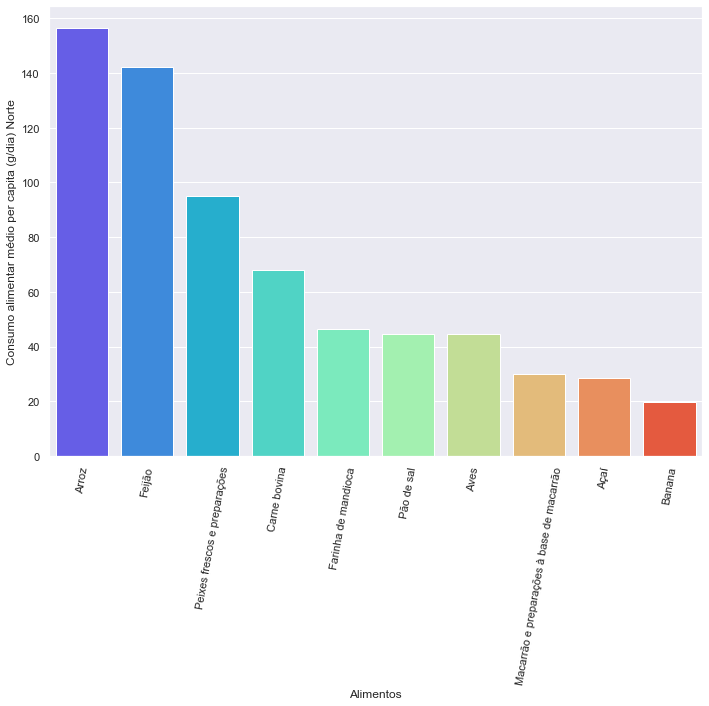

In [93]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Alimentos',y='Consumo alimentar médio per capita (g/dia) Norte',data=mais_norte,palette='rainbow')
plt.xticks(rotation=80);

In [94]:
#Os 10 alimentos menos consumidos na região norte (per capita)
menos_norte = ibge_tab1_4.sort_values(by = "Consumo alimentar médio per capita (g/dia) Norte", ascending = True).head(10)

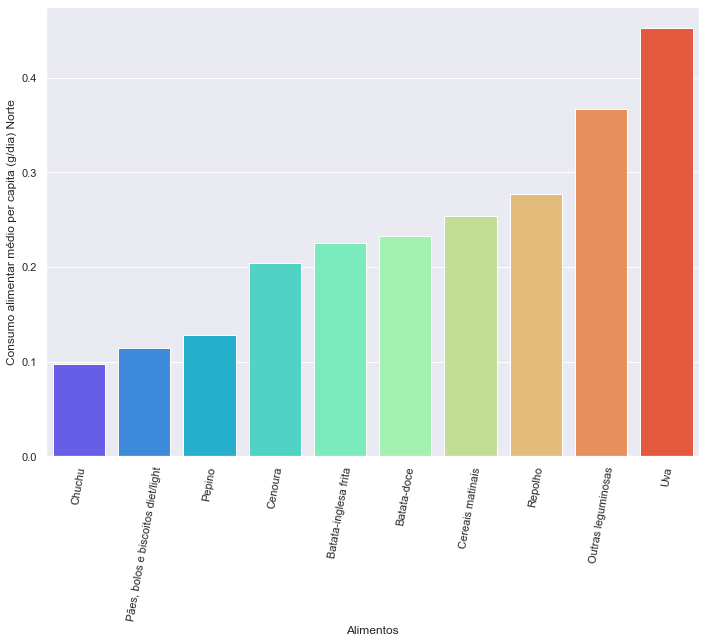

In [95]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Alimentos',y='Consumo alimentar médio per capita (g/dia) Norte',data=menos_norte,palette='rainbow')
plt.xticks(rotation=80);

In [96]:
#Os 10 alimentos mais consumidos na região nordeste (per capita)
mais_nordeste = ibge_tab1_4.sort_values(by = "Consumo alimentar médio per capita (g/dia) Nordeste", ascending = False).head(10)

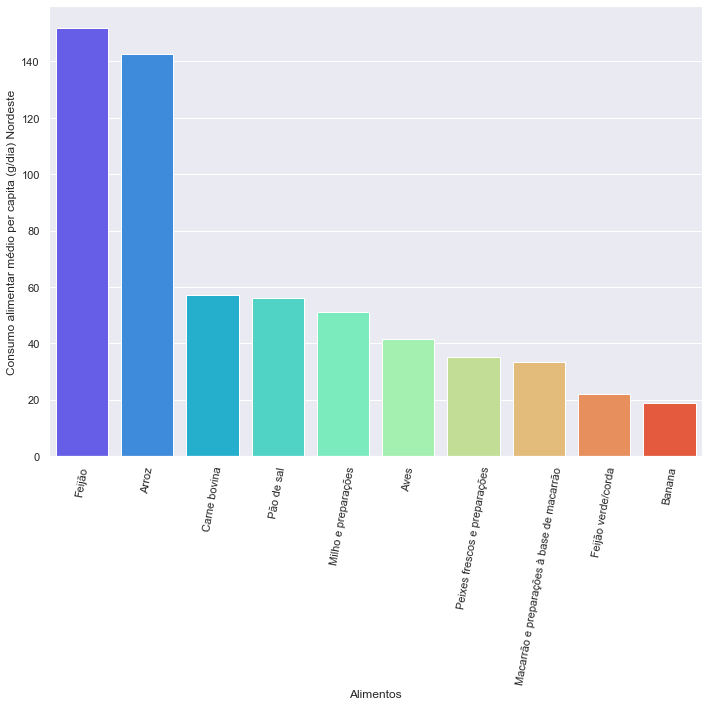

In [97]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Alimentos',y='Consumo alimentar médio per capita (g/dia) Nordeste',data=mais_nordeste,palette='rainbow')
plt.xticks(rotation=80);

In [98]:
#Os 10 alimentos menos consumidos na região nordeste (per capita)
menos_nordeste = ibge_tab1_4.sort_values(by = "Consumo alimentar médio per capita (g/dia) Nordeste", ascending = True).head(10)

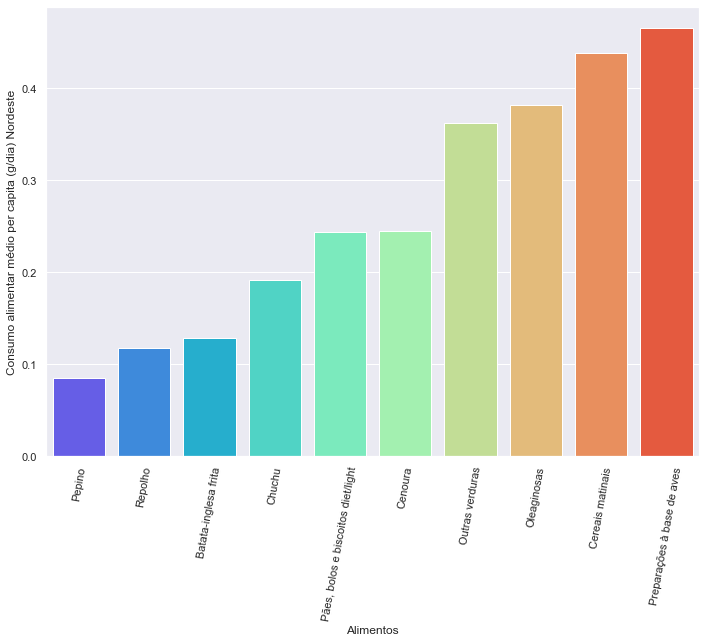

In [99]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Alimentos',y='Consumo alimentar médio per capita (g/dia) Nordeste',data=menos_nordeste,palette='rainbow')
plt.xticks(rotation=80);

In [100]:
#Os 10 alimentos mais consumidos (per capita)
mais_norte 

,Alimentos,Consumo alimentar médio per capita (g/dia) Norte,Consumo alimentar médio per capita (g/dia) Nordeste,Consumo alimentar médio per capita (g/dia) Sudeste,Consumo alimentar médio per capita (g/dia) Sul,Consumo alimentar médio per capita (g/dia) Centro-Oeste
0,Arroz,156.564,142.565,175.616,133.846,194.537
4,Feijão,142.184,151.957,218.096,147.443,206.218
55,Peixes frescos e preparações,94.9592,35.1324,11.4358,6.83857,8.49356
50,Carne bovina,68.1558,57.1173,63.1653,60.1447,88.1477
37,Farinha de mandioca,46.2379,11.5429,0.833841,0.2452,0.478275
43,Pão de sal,44.6767,56.086,52.0862,59.1764,43.131
53,Aves,44.4237,41.6629,32.6507,32.7749,39.1262
42,Macarrão e preparações à base de macarrão,29.9431,33.3646,33.7713,56.4929,28.5697
25,Açaí,28.3613,1.09982,1.13964,NaN,0.140078
26,Banana,19.8944,18.6514,18.5405,19.1737,15.8759


In [101]:
mais_nordeste

,Alimentos,Consumo alimentar médio per capita (g/dia) Norte,Consumo alimentar médio per capita (g/dia) Nordeste,Consumo alimentar médio per capita (g/dia) Sudeste,Consumo alimentar médio per capita (g/dia) Sul,Consumo alimentar médio per capita (g/dia) Centro-Oeste
4,Feijão,142.184,151.957,218.096,147.443,206.218
0,Arroz,156.564,142.565,175.616,133.846,194.537
50,Carne bovina,68.1558,57.1173,63.1653,60.1447,88.1477
43,Pão de sal,44.6767,56.086,52.0862,59.1764,43.131
3,Milho e preparações,8.05914,50.9072,7.3864,12.8053,9.23142
53,Aves,44.4237,41.6629,32.6507,32.7749,39.1262
55,Peixes frescos e preparações,94.9592,35.1324,11.4358,6.83857,8.49356
42,Macarrão e preparações à base de macarrão,29.9431,33.3646,33.7713,56.4929,28.5697
5,Feijão verde/corda,2.08707,21.9936,0.186109,NaN,0.220552
26,Banana,19.8944,18.6514,18.5405,19.1737,15.8759


In [102]:
mais_sudeste = ibge_tab1_4.sort_values(by = "Consumo alimentar médio per capita (g/dia) Sudeste", ascending = False).head(10)
mais_sul = ibge_tab1_4.sort_values(by = "Consumo alimentar médio per capita (g/dia) Sul", ascending = False).head(10)
mais_centrooeste = ibge_tab1_4.sort_values(by = "Consumo alimentar médio per capita (g/dia) Centro-Oeste", ascending = False).head(10)

In [103]:
mais_sudeste

,Alimentos,Consumo alimentar médio per capita (g/dia) Norte,Consumo alimentar médio per capita (g/dia) Nordeste,Consumo alimentar médio per capita (g/dia) Sudeste,Consumo alimentar médio per capita (g/dia) Sul,Consumo alimentar médio per capita (g/dia) Centro-Oeste
4,Feijão,142.184,151.957,218.096,147.443,206.218
0,Arroz,156.564,142.565,175.616,133.846,194.537
50,Carne bovina,68.1558,57.1173,63.1653,60.1447,88.1477
43,Pão de sal,44.6767,56.086,52.0862,59.1764,43.131
42,Macarrão e preparações à base de macarrão,29.9431,33.3646,33.7713,56.4929,28.5697
53,Aves,44.4237,41.6629,32.6507,32.7749,39.1262
20,Batata-inglesa,5.31026,3.97731,23.1633,18.5753,6.75416
27,Laranja,19.4752,16.5788,22.1473,25.6698,17.2768
26,Banana,19.8944,18.6514,18.5405,19.1737,15.8759
11,Salada crua,9.62976,8.77286,16.7991,17.002,26.6251


In [104]:
mais_sul

,Alimentos,Consumo alimentar médio per capita (g/dia) Norte,Consumo alimentar médio per capita (g/dia) Nordeste,Consumo alimentar médio per capita (g/dia) Sudeste,Consumo alimentar médio per capita (g/dia) Sul,Consumo alimentar médio per capita (g/dia) Centro-Oeste
4,Feijão,142.184,151.957,218.096,147.443,206.218
0,Arroz,156.564,142.565,175.616,133.846,194.537
50,Carne bovina,68.1558,57.1173,63.1653,60.1447,88.1477
43,Pão de sal,44.6767,56.086,52.0862,59.1764,43.131
42,Macarrão e preparações à base de macarrão,29.9431,33.3646,33.7713,56.4929,28.5697
53,Aves,44.4237,41.6629,32.6507,32.7749,39.1262
27,Laranja,19.4752,16.5788,22.1473,25.6698,17.2768
28,Maçã,7.80789,6.46128,12.5263,19.4174,13.3356
26,Banana,19.8944,18.6514,18.5405,19.1737,15.8759
20,Batata-inglesa,5.31026,3.97731,23.1633,18.5753,6.75416


In [105]:
mais_centrooeste

,Alimentos,Consumo alimentar médio per capita (g/dia) Norte,Consumo alimentar médio per capita (g/dia) Nordeste,Consumo alimentar médio per capita (g/dia) Sudeste,Consumo alimentar médio per capita (g/dia) Sul,Consumo alimentar médio per capita (g/dia) Centro-Oeste
4,Feijão,142.184,151.957,218.096,147.443,206.218
0,Arroz,156.564,142.565,175.616,133.846,194.537
50,Carne bovina,68.1558,57.1173,63.1653,60.1447,88.1477
43,Pão de sal,44.6767,56.086,52.0862,59.1764,43.131
53,Aves,44.4237,41.6629,32.6507,32.7749,39.1262
42,Macarrão e preparações à base de macarrão,29.9431,33.3646,33.7713,56.4929,28.5697
11,Salada crua,9.62976,8.77286,16.7991,17.002,26.6251
45,Bolos,11.1943,10.5467,14.6097,17.2755,18.6375
27,Laranja,19.4752,16.5788,22.1473,25.6698,17.2768
26,Banana,19.8944,18.6514,18.5405,19.1737,15.8759


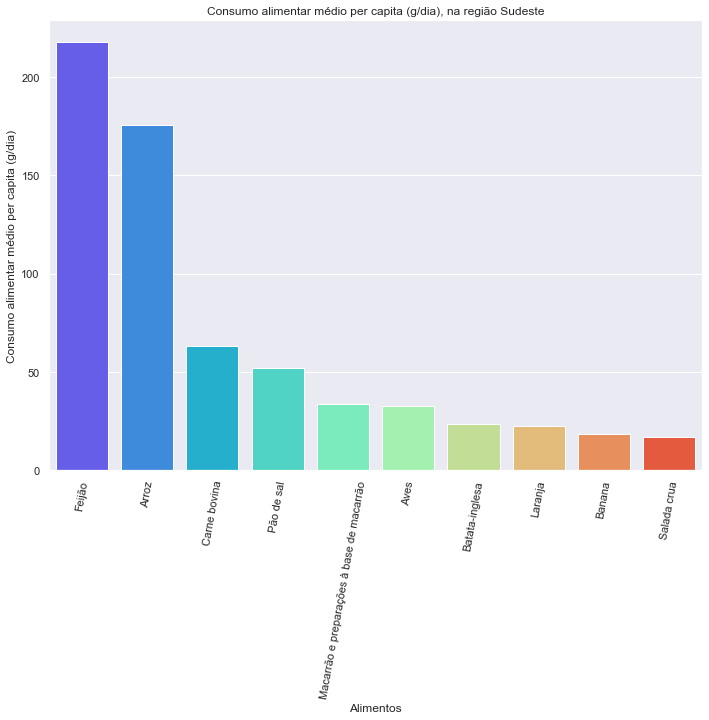

In [106]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Alimentos',y='Consumo alimentar médio per capita (g/dia) Sudeste',data=mais_sudeste,palette='rainbow').set(
             title='Consumo alimentar médio per capita (g/dia), na região Sudeste')
plt.xlabel("Alimentos")
plt.ylabel("Consumo alimentar médio per capita (g/dia)")
plt.xticks(rotation=80);

In [107]:
menos_sudeste = ibge_tab1_4.sort_values(by = "Consumo alimentar médio per capita (g/dia) Sudeste", ascending = True).head(10)

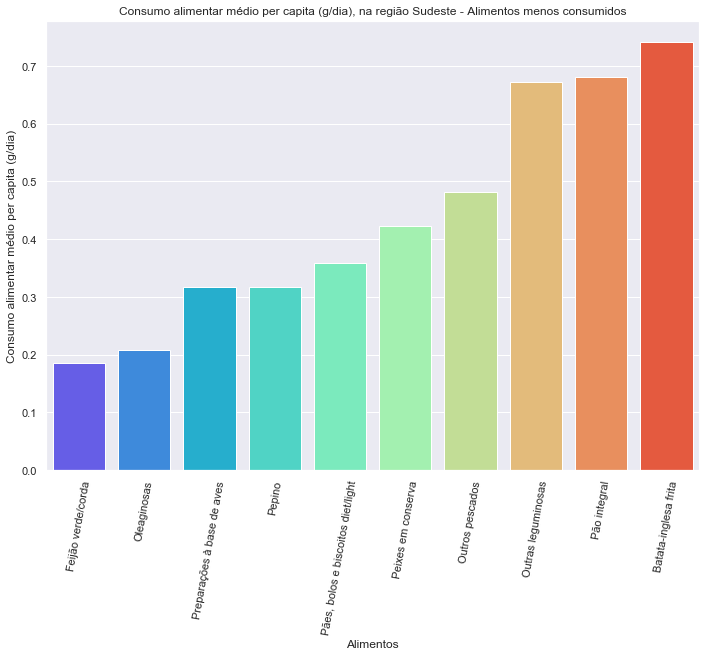

In [108]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Alimentos',y='Consumo alimentar médio per capita (g/dia) Sudeste',data=menos_sudeste,palette='rainbow').set(
             title='Consumo alimentar médio per capita (g/dia), na região Sudeste - Alimentos menos consumidos')
plt.xlabel("Alimentos")
plt.ylabel("Consumo alimentar médio per capita (g/dia)")
plt.xticks(rotation=80);

In [109]:
# abrindo csv:
ibge_tab1_6=pd.read_excel('tab1_6.xls')
#Tabela 1.6 - Prevalência de consumo alimentar, consumo alimentar médio per capita e percentual de consumo fora do domicílio
#em relação ao total consumido dos adolescentes, adultos e idosos, segundo os alimentos - Brasil - período 2008-2009

In [110]:
ibge_tab1_6.head(10)

,"Tabela 1.6 - Prevalência de consumo alimentar, consumo alimentar médio per capita e percentual",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,de consumo fora do domicílio em relação ao tot...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"adultos e idosos, segundo os alimentos - Brasi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(continua),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alimentos,Prevalência de consumo alimentar (%),NaN,NaN,Consumo alimentar\nmédio per capita (g/dia),NaN,NaN,Percentual de consumo fora\ndo domicílio em re...,NaN,NaN
4,NaN,Adoles-\ncentes,Adultos,Idosos,Adoles-\ncentes,Adultos,Idosos,Adoles-\ncentes,Adultos,Idosos
5,Arroz,83.5764,84.3378,82.7089,158.913,164.962,138.759,7.29578,15.2415,4.75215
6,Arroz integral,3.18432,3.73476,4.2612,7.86077,8.28001,7.63794,7.14801,17.1905,11.9107
7,Preparações à base de arroz,1.42957,1.3648,1.49143,2.51691,2.46834,2.13254,24.1113,21.4833,16.9996
8,Milho e preparações,15.1214,12.523,11.9636,21.573,20.2529,19.0706,7.78143,8.70752,1.39382
9,Feijão,71.996,73.1178,72.1444,183.912,186.895,161.092,6.061,15.144,5.14748


In [111]:
# Excluindo as linhas extras do início, mantendo apenas os dados de interesse.
for i in range (3):
    ibge_tab1_6.drop([i], axis=0, inplace = True)

In [112]:
ibge_tab1_6.head()

,"Tabela 1.6 - Prevalência de consumo alimentar, consumo alimentar médio per capita e percentual",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
3,Alimentos,Prevalência de consumo alimentar (%),NaN,NaN,Consumo alimentar\nmédio per capita (g/dia),NaN,NaN,Percentual de consumo fora\ndo domicílio em re...,NaN,NaN
4,NaN,Adoles-\ncentes,Adultos,Idosos,Adoles-\ncentes,Adultos,Idosos,Adoles-\ncentes,Adultos,Idosos
5,Arroz,83.5764,84.3378,82.7089,158.913,164.962,138.759,7.29578,15.2415,4.75215
6,Arroz integral,3.18432,3.73476,4.2612,7.86077,8.28001,7.63794,7.14801,17.1905,11.9107
7,Preparações à base de arroz,1.42957,1.3648,1.49143,2.51691,2.46834,2.13254,24.1113,21.4833,16.9996


In [113]:
ibge(ibge_tab1_6)

In [114]:
ibge_tab1_6.head()

,Alimentos,Prevalência de consumo alimentar (%),nan,nan,Consumo alimentar médio per capita (g/dia),nan,nan,Percentual de consumo fora do domicílio em relação ao total consumido (%),nan,nan
1,NaN,Adoles-\ncentes,Adultos,Idosos,Adoles-\ncentes,Adultos,Idosos,Adoles-\ncentes,Adultos,Idosos
2,Arroz,83.5764,84.3378,82.7089,158.913,164.962,138.759,7.29578,15.2415,4.75215
3,Arroz integral,3.18432,3.73476,4.2612,7.86077,8.28001,7.63794,7.14801,17.1905,11.9107
4,Preparações à base de arroz,1.42957,1.3648,1.49143,2.51691,2.46834,2.13254,24.1113,21.4833,16.9996
5,Milho e preparações,15.1214,12.523,11.9636,21.573,20.2529,19.0706,7.78143,8.70752,1.39382


In [115]:
lst4=['Alimentos', 'Prevalência de consumo alimentar (%) Adolescentes','Prevalência de consumo alimentar (%) Adultos','Prevalência de consumo alimentar (%) Idosos','Consumo alimentar médio per capita (g/dia) Adolescentes','Consumo alimentar médio per capita (g/dia) Adultos','Consumo alimentar médio per capita (g/dia) Idosos', 'Percentual de consumo fora do domicílio em relação ao total consumido (%) Adolescentes','Percentual de consumo fora do domicílio em relação ao total consumido (%) Adultos','Percentual de consumo fora do domicílio em relação ao total consumido (%) Idosos']

In [116]:
ibge_tab1_6.columns=lst4

In [117]:
ibge_tab1_6.drop([1], axis=0, inplace = True)

In [118]:
ibge_tab1_6.reset_index(inplace=True)
ibge_tab1_6.drop(['index'], axis=1, inplace = True)

In [119]:
ibge_tab1_6.to_csv(r'ibge_tab1_6.csv',index=False,sep=';')

In [120]:
ibge_tab1_6.head()

,Alimentos,Prevalência de consumo alimentar (%) Adolescentes,Prevalência de consumo alimentar (%) Adultos,Prevalência de consumo alimentar (%) Idosos,Consumo alimentar médio per capita (g/dia) Adolescentes,Consumo alimentar médio per capita (g/dia) Adultos,Consumo alimentar médio per capita (g/dia) Idosos,Percentual de consumo fora do domicílio em relação ao total consumido (%) Adolescentes,Percentual de consumo fora do domicílio em relação ao total consumido (%) Adultos,Percentual de consumo fora do domicílio em relação ao total consumido (%) Idosos
0,Arroz,83.5764,84.3378,82.7089,158.913,164.962,138.759,7.29578,15.2415,4.75215
1,Arroz integral,3.18432,3.73476,4.2612,7.86077,8.28001,7.63794,7.14801,17.1905,11.9107
2,Preparações à base de arroz,1.42957,1.3648,1.49143,2.51691,2.46834,2.13254,24.1113,21.4833,16.9996
3,Milho e preparações,15.1214,12.523,11.9636,21.573,20.2529,19.0706,7.78143,8.70752,1.39382
4,Feijão,71.996,73.1178,72.1444,183.912,186.895,161.092,6.061,15.144,5.14748


In [121]:
# abrindo csv:
ibge_tab2_1=pd.read_excel('tab2_1.xls')
#Tabela 2.1 - Média do consumo de energia e nutrientes e percentual do consumo calórico total dos nutrientes, por sexo 
#e grupos de idade, segundo os nutrientes - Brasil - período 2008-2009
#(1) Inclui o percentual do consumo calórico total do açúcar total. 
#(2) Inclui o percentual do consumo calórico total dos ácidos graxos.

In [122]:
ibge_tab2_1=ibge_tab2_1.T

In [123]:
for i in range (4):
    ibge_tab2_1.drop([i], axis=1, inplace = True)

In [124]:
col=ibge_tab2_1.iloc[0]
ibge_tab2_1.columns=col

In [125]:
ibge_tab2_1.reset_index(inplace=True)
ibge_tab2_1.drop(['index'], axis=1, inplace = True)

In [126]:
ibge_tab2_1.drop([0], axis=0, inplace = True)

In [127]:
ibge_tab2_1.head()

Tabela 2.1 - Média do consumo de energia e nutrientes e percentual do consumo calórico total dos,nan,nan,Energia,Calorias (kcal),Proteína,Média do consumo (g),Percentual do consumo calórico total (% kcal),Carboidrato,Média do consumo (g),Percentual do consumo calórico total (% kcal) (1),...,Ácidos graxos trans total,Média do consumo (g),Fibra,Média do consumo (g),Açúcar total,Média do consumo (g),Percentual do consumo calórico total (% kcal),nan,"Fonte: IBGE, Diretoria de Pesquisas, Coordenação de Trabalho e Rendimento, Pesquisa de Orçamentos Familiares 2008-2009.",(1) Inclui o percentual do consumo calórico total do açúcar total. (2) Inclui o percentual do consumo calórico total dos ácidos graxos.
1,Masculino,10 a 13 anos,NaN,1984.31,NaN,76.4264,15.397,NaN,282.606,56.9681,...,NaN,2.39255,NaN,20.4274,NaN,105.431,21.253,NaN,NaN,NaN
2,NaN,14 a 18 anos,NaN,2288.53,NaN,91.4634,15.9864,NaN,320.078,55.9448,...,NaN,3.06754,NaN,23.3962,NaN,113.063,19.7616,NaN,NaN,NaN
3,NaN,19 a 59 anos,NaN,2163.03,NaN,91.5186,16.9241,NaN,296.182,54.7717,...,NaN,2.62923,NaN,23.5076,NaN,96.3233,17.8126,NaN,NaN,NaN
4,NaN,60 anos ou mais,NaN,1795.5,NaN,77.3874,17.2403,NaN,248.427,55.3445,...,NaN,2.12862,NaN,21.4726,NaN,78.1774,17.4163,NaN,NaN,NaN
5,Feminino,10 a 13 anos,NaN,1893.02,NaN,71.2808,15.0619,NaN,272.585,57.598,...,NaN,2.21194,NaN,18.8498,NaN,106.825,22.5725,NaN,NaN,NaN


In [128]:
ibge_tab2_1.drop(['Energia'], axis=1, inplace = True)
ibge_tab2_1.drop(['Proteína'], axis=1, inplace = True)
ibge_tab2_1.drop(['Carboidrato'], axis=1, inplace = True)

In [129]:
ibge_tab2_1.drop(['Lipídeos totais'], axis=1, inplace = True)

In [130]:
ibge_tab2_1.drop(['Colesterol'], axis=1, inplace = True)
ibge_tab2_1.drop(['Ácidos graxos saturados'], axis=1, inplace = True)
ibge_tab2_1.drop(['Ácidos graxos monoinsaturados'], axis=1, inplace = True)

In [131]:
ibge_tab2_1.drop(['Ácidos graxos poli-insaturados'], axis=1, inplace = True)
ibge_tab2_1.drop(['Ácido graxo poli-insaturado linoléico'], axis=1, inplace = True)
ibge_tab2_1.drop(['Ácido graxo poli-insaturado linolênico'], axis=1, inplace = True)
ibge_tab2_1.drop(['Ácidos graxos trans total'], axis=1, inplace = True)
ibge_tab2_1.drop(['Fibra'], axis=1, inplace = True)
ibge_tab2_1.drop(['Açúcar total'], axis=1, inplace = True)

In [132]:
ibge_tab2_1

Tabela 2.1 - Média do consumo de energia e nutrientes e percentual do consumo calórico total dos,nan,nan,Calorias (kcal),Média do consumo (g),Percentual do consumo calórico total (% kcal),Média do consumo (g),Percentual do consumo calórico total (% kcal) (1),Média do consumo (g),Percentual do consumo calórico total (% kcal) (2),Média do consumo (mg),...,Média do consumo (g),Média do consumo (g),Média do consumo (g),Média do consumo (g),Média do consumo (g),Média do consumo (g),Percentual do consumo calórico total (% kcal),nan,"Fonte: IBGE, Diretoria de Pesquisas, Coordenação de Trabalho e Rendimento, Pesquisa de Orçamentos Familiares 2008-2009.",(1) Inclui o percentual do consumo calórico total do açúcar total. (2) Inclui o percentual do consumo calórico total dos ácidos graxos.
1,Masculino,10 a 13 anos,1984.31,76.4264,15.397,282.606,56.9681,61.4482,27.8703,247.176,...,12.5859,10.9242,1.42871,2.39255,20.4274,105.431,21.253,NaN,NaN,NaN
2,NaN,14 a 18 anos,2288.53,91.4634,15.9864,320.078,55.9448,71.2812,28.0324,282.111,...,15.1158,13.1714,1.69534,3.06754,23.3962,113.063,19.7616,NaN,NaN,NaN
3,NaN,19 a 59 anos,2163.03,91.5186,16.9241,296.182,54.7717,65.3772,27.2023,276.37,...,14.3706,12.4498,1.65482,2.62923,23.5076,96.3233,17.8126,NaN,NaN,NaN
4,NaN,60 anos ou mais,1795.5,77.3874,17.2403,248.427,55.3445,53.3747,26.7543,231.085,...,11.6176,10.0029,1.37468,2.12862,21.4726,78.1774,17.4163,NaN,NaN,NaN
5,Feminino,10 a 13 anos,1893.02,71.2808,15.0619,272.585,57.598,58.1722,27.6569,222.621,...,12.1713,10.6128,1.35725,2.21194,18.8498,106.825,22.5725,NaN,NaN,NaN
6,NaN,14 a 18 anos,1930.36,72.978,15.1221,274.395,56.8587,60.5473,28.2292,237.89,...,12.7969,11.1562,1.434,2.63859,18.5214,110.714,22.9415,NaN,NaN,NaN
7,NaN,19 a 59 anos,1710.24,70.1362,16.4038,240.485,56.2459,52.2646,27.5039,216.836,...,10.9362,9.45834,1.26027,2.21529,18.1897,90.705,21.2146,NaN,NaN,NaN
8,NaN,60 anos ou mais,1489.81,62.8896,16.8853,210.918,56.6295,44.6466,26.9712,186.294,...,9.39972,8.07921,1.10928,1.86559,17.573,74.7734,20.076,NaN,NaN,NaN


In [133]:
lst5=['Sexo','Idade','Energia Calorias (kcal)','Proteína Média do consumo (g)','Percentual do consumo calórico total (% kcal)','Carboidrato Média do consumo (g)','Percentual do consumo calórico total (% kcal) (1)','Lipídeos totais Média do consumo (g)','Percentual do consumo calórico total (% kcal) (2)','Colesterol Média do consumo (mg)','Ácidos graxos saturados Média do consumo (mg)',
     'Percentual do consumo calórico total (% kcal)','Ácidos graxos monoinsaturados Média do consumo (g)','Ácidos graxos poli-insaturados Média do consumo (g)','Ácido graxo poli-insaturado linoléico Média do consumo (g)','Ácido graxo poli-insaturado linolênico Média do consumo (g)','Ácidos graxos trans total Média do consumo (g)','Fibra Média do consumo (g)','Açúcar total Média do consumo (g)',
     'Percentual do consumo calórico total (% kcal)','0','1','2']

In [134]:
len(lst5)

23

In [135]:
ibge_tab2_1.columns=lst5

In [136]:
ibge_tab2_1.drop(['0'], axis=1, inplace = True)
ibge_tab2_1.drop(['1'], axis=1, inplace = True)

In [137]:
ibge_tab2_1.drop(['2'], axis=1, inplace = True)

In [138]:
ibge_tab2_1.loc[[2],['Sexo']]='Masculino'
ibge_tab2_1.loc[[3],['Sexo']]='Masculino'
ibge_tab2_1.loc[[4],['Sexo']]='Masculino'

In [139]:
ibge_tab2_1['Sexo']=ibge_tab2_1['Sexo'].fillna('Feminino')

In [140]:
ibge_tab2_1.reset_index(inplace=True)
ibge_tab2_1.drop(['index'], axis=1, inplace = True)

In [141]:
ibge_tab2_1

,Sexo,Idade,Energia Calorias (kcal),Proteína Média do consumo (g),Percentual do consumo calórico total (% kcal),Carboidrato Média do consumo (g),Percentual do consumo calórico total (% kcal) (1),Lipídeos totais Média do consumo (g),Percentual do consumo calórico total (% kcal) (2),Colesterol Média do consumo (mg),Ácidos graxos saturados Média do consumo (mg),Percentual do consumo calórico total (% kcal),Ácidos graxos monoinsaturados Média do consumo (g),Ácidos graxos poli-insaturados Média do consumo (g),Ácido graxo poli-insaturado linoléico Média do consumo (g),Ácido graxo poli-insaturado linolênico Média do consumo (g),Ácidos graxos trans total Média do consumo (g),Fibra Média do consumo (g),Açúcar total Média do consumo (g),Percentual do consumo calórico total (% kcal)
0,Masculino,10 a 13 anos,1984.31,76.4264,15.397,282.606,56.9681,61.4482,27.8703,247.176,21.7982,9.88674,20.5184,12.5859,10.9242,1.42871,2.39255,20.4274,105.431,21.253
1,Masculino,14 a 18 anos,2288.53,91.4634,15.9864,320.078,55.9448,71.2812,28.0324,282.111,24.5543,9.65637,24.1813,15.1158,13.1714,1.69534,3.06754,23.3962,113.063,19.7616
2,Masculino,19 a 59 anos,2163.03,91.5186,16.9241,296.182,54.7717,65.3772,27.2023,276.37,22.2219,9.24614,22.1063,14.3706,12.4498,1.65482,2.62923,23.5076,96.3233,17.8126
3,Masculino,60 anos ou mais,1795.5,77.3874,17.2403,248.427,55.3445,53.3747,26.7543,231.085,18.3002,9.17305,17.7343,11.6176,10.0029,1.37468,2.12862,21.4726,78.1774,17.4163
4,Feminino,10 a 13 anos,1893.02,71.2808,15.0619,272.585,57.598,58.1722,27.6569,222.621,20.7777,9.87836,19.4645,12.1713,10.6128,1.35725,2.21194,18.8498,106.825,22.5725
5,Feminino,14 a 18 anos,1930.36,72.978,15.1221,274.395,56.8587,60.5473,28.2292,237.89,21.0774,9.82699,20.3633,12.7969,11.1562,1.434,2.63859,18.5214,110.714,22.9415
6,Feminino,19 a 59 anos,1710.24,70.1362,16.4038,240.485,56.2459,52.2646,27.5039,216.836,18.4014,9.6836,17.4896,10.9362,9.45834,1.26027,2.21529,18.1897,90.705,21.2146
7,Feminino,60 anos ou mais,1489.81,62.8896,16.8853,210.918,56.6295,44.6466,26.9712,186.294,15.8902,9.59934,14.6727,9.39972,8.07921,1.10928,1.86559,17.573,74.7734,20.076


In [142]:
ibge_tab2_1.to_csv(r'ibge_tab2_1.csv',index=False,sep=';')

In [143]:
mask11 = ibge_tab2_1["Sexo"] =='Masculino'
masc=ibge_tab2_1[mask11]

''

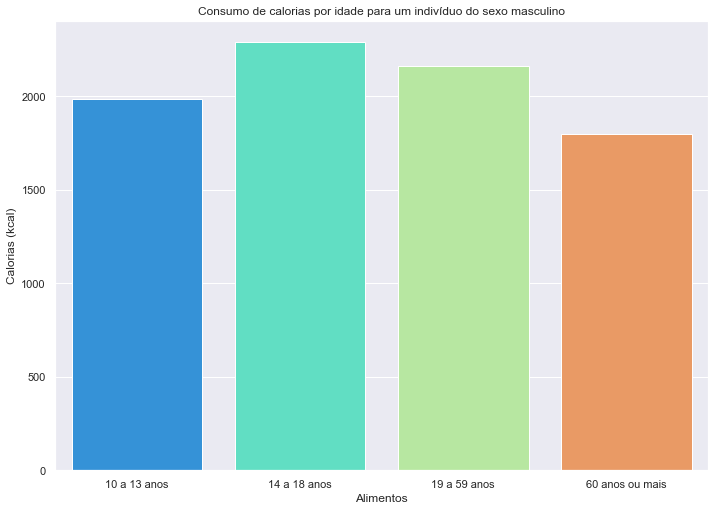

In [144]:
sns.barplot(x='Idade',y='Energia Calorias (kcal)',data=masc,palette='rainbow',ci=None).set(
             title='Consumo de calorias por idade para um indivíduo do sexo masculino')
plt.xlabel("Alimentos")
plt.ylabel("Calorias (kcal)")
;

''

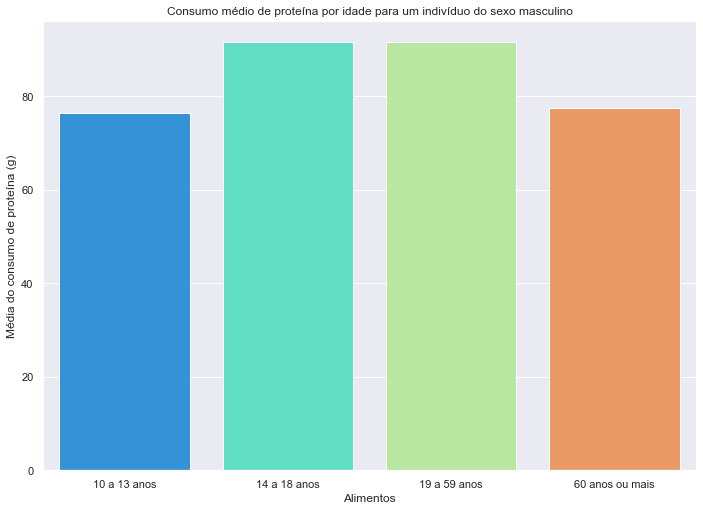

In [145]:
sns.barplot(x='Idade',y='Proteína Média do consumo (g)',data=masc,palette='rainbow',ci=None).set(
             title='Consumo médio de proteína por idade para um indivíduo do sexo masculino')
plt.xlabel("Alimentos")
plt.ylabel("Média do consumo de proteína (g)")
;

''

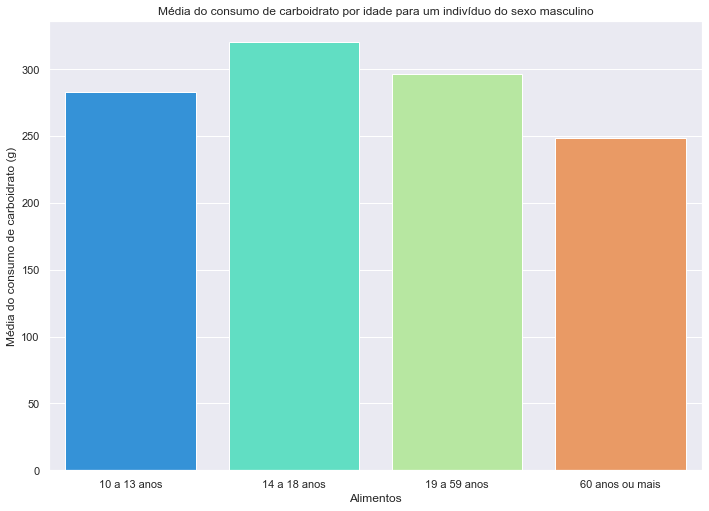

In [146]:
sns.barplot(x='Idade',y='Carboidrato Média do consumo (g)',data=masc,palette='rainbow',ci=None).set(
             title='Média do consumo de carboidrato por idade para um indivíduo do sexo masculino')
plt.xlabel("Alimentos")
plt.ylabel("Média do consumo de carboidrato (g)")
;

In [147]:
mask12 = ibge_tab2_1["Idade"] =='19 a 59 anos'
adultos=ibge_tab2_1[mask12]

In [148]:
adultos

,Sexo,Idade,Energia Calorias (kcal),Proteína Média do consumo (g),Percentual do consumo calórico total (% kcal),Carboidrato Média do consumo (g),Percentual do consumo calórico total (% kcal) (1),Lipídeos totais Média do consumo (g),Percentual do consumo calórico total (% kcal) (2),Colesterol Média do consumo (mg),Ácidos graxos saturados Média do consumo (mg),Percentual do consumo calórico total (% kcal),Ácidos graxos monoinsaturados Média do consumo (g),Ácidos graxos poli-insaturados Média do consumo (g),Ácido graxo poli-insaturado linoléico Média do consumo (g),Ácido graxo poli-insaturado linolênico Média do consumo (g),Ácidos graxos trans total Média do consumo (g),Fibra Média do consumo (g),Açúcar total Média do consumo (g),Percentual do consumo calórico total (% kcal)
2,Masculino,19 a 59 anos,2163.03,91.5186,16.9241,296.182,54.7717,65.3772,27.2023,276.37,22.2219,9.24614,22.1063,14.3706,12.4498,1.65482,2.62923,23.5076,96.3233,17.8126
6,Feminino,19 a 59 anos,1710.24,70.1362,16.4038,240.485,56.2459,52.2646,27.5039,216.836,18.4014,9.6836,17.4896,10.9362,9.45834,1.26027,2.21529,18.1897,90.705,21.2146


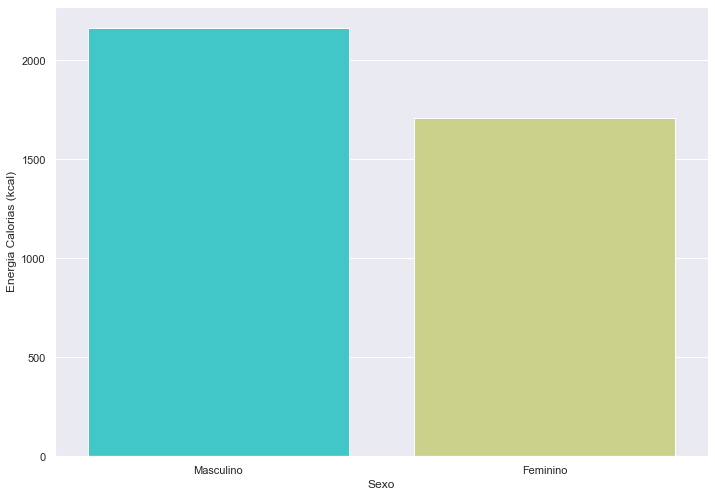

In [149]:
sns.barplot(x='Sexo',y='Energia Calorias (kcal)',data=adultos,palette='rainbow',ci=None);

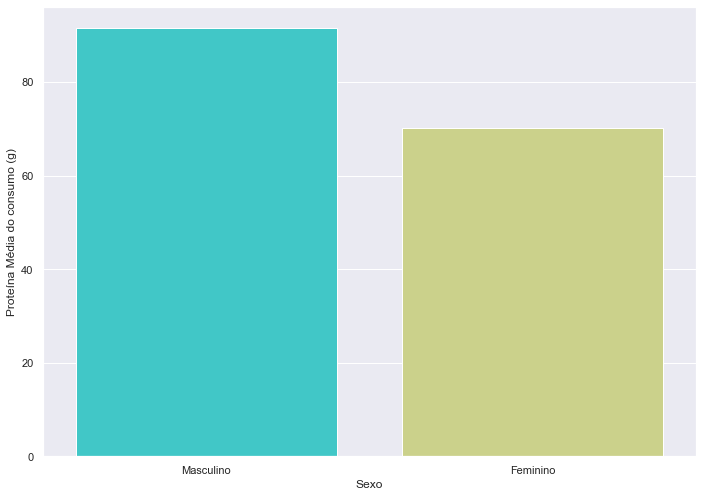

In [150]:
sns.barplot(x='Sexo',y='Proteína Média do consumo (g)',data=adultos,palette='rainbow',ci=None);

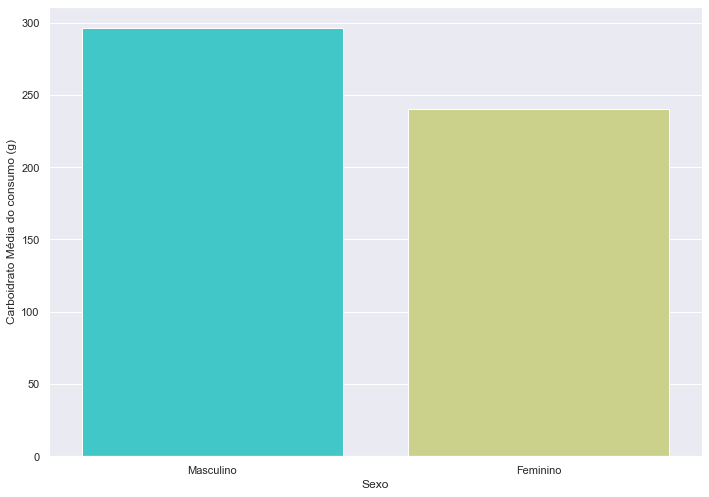

In [151]:
sns.barplot(x='Sexo',y='Carboidrato Média do consumo (g)',data=adultos,palette='rainbow',ci=None);

In [152]:
# abrindo csv:
ibge_tab2_3=pd.read_excel('tab2_3.xls')
#Tabela 2.3 - Média do consumo de nutrientes e percentual do consumo calórico total dos nutrientes, por sexo e grupos 
#de idade, segundo as Grandes Regiões - período 2008-2009

In [153]:
ibge_tab2_3=ibge_tab2_3.T

In [154]:
ibge_tab2_3.drop([0,3], axis=1, inplace = True)

In [155]:
ibge_tab2_3.drop([1,2], axis=1, inplace = True)

In [156]:
ibge_tab2_3.head(10)

,4,5,6,7,8,9,10,11,12,13,...,39,40,41,42,43,44,45,46,47,48
"Tabela 2.3 - Média do consumo de nutrientes e percentual do consumo calórico total dos nutrientes,",NaN,NaN,Energia,Norte,Calorias (kcal),Nordeste,Calorias (kcal),Sudeste,Calorias (kcal),Sul,...,Percentual do consumo calórico total (% kcal),Sudeste,Média do consumo (g),Percentual do consumo calórico total (% kcal),Sul,Média do consumo (g),Percentual do consumo calórico total (% kcal),Centro-Oeste,Média do consumo (g),Percentual do consumo calórico total (% kcal)
Unnamed: 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 2,Masculino,10 a 13 anos,NaN,NaN,2198.92,NaN,1868.86,NaN,2029.39,NaN,...,57.6966,NaN,285.018,56.178,NaN,279.269,57.2363,NaN,285.754,57.1878
Unnamed: 3,NaN,14 a 18 anos,NaN,NaN,2495.94,NaN,2101.57,NaN,2420.82,NaN,...,57.3873,NaN,330.759,54.6525,NaN,312.612,56.0371,NaN,301.967,55.2844
Unnamed: 4,NaN,19 a 59 anos,NaN,NaN,2355.73,NaN,2173.99,NaN,2127.29,NaN,...,55.7548,NaN,289.693,54.4717,NaN,299.278,55.0854,NaN,277.652,52.5749
Unnamed: 5,NaN,60 anos ou mais,NaN,NaN,1986.33,NaN,1777.83,NaN,1791.76,NaN,...,56.7733,NaN,247.302,55.2086,NaN,243.725,54.9597,NaN,232.354,52.2665
Unnamed: 6,Feminino,10 a 13 anos,NaN,NaN,2016.58,NaN,1830.56,NaN,1872.92,NaN,...,57.2438,NaN,268.525,57.3488,NaN,280.313,57.7658,NaN,290.37,58.5863
Unnamed: 7,NaN,14 a 18 anos,NaN,NaN,2085.57,NaN,1865.53,NaN,1949.81,NaN,...,57.1082,NaN,275.32,56.4812,NaN,282.978,57.5033,NaN,263.525,57.3638
Unnamed: 8,NaN,19 a 59 anos,NaN,NaN,1849.87,NaN,1683.04,NaN,1715.34,NaN,...,56.7276,NaN,239.09,55.7533,NaN,240.773,57.0954,NaN,233.863,55.4136
Unnamed: 9,NaN,60 anos ou mais,NaN,NaN,1659.89,NaN,1448.24,NaN,1504.01,NaN,...,57.5782,NaN,208.796,55.5305,NaN,217.864,58.7337,NaN,198.046,54.537


In [157]:
ibge_tab2_3.reset_index(inplace=True)
ibge_tab2_3.drop(['index'], axis=1, inplace = True)

In [158]:
col1=ibge_tab2_3.iloc[0]
ibge_tab2_3.columns=col1

In [159]:
ibge_tab2_3.drop([0], axis=0, inplace = True)
ibge_tab2_3.drop([1], axis=0, inplace = True)

In [160]:
ibge_tab2_3.reset_index(inplace=True)
ibge_tab2_3.drop(['index'], axis=1, inplace = True)

In [161]:
ibge_tab2_3.columns

Index([                                            nan,
                                                   nan,
                                            'Energia ',
                                               'Norte',
                                     'Calorias (kcal)',
                                            'Nordeste',
                                     'Calorias (kcal)',
                                             'Sudeste',
                                     'Calorias (kcal)',
                                                 'Sul',
                                     'Calorias (kcal)',
                                        'Centro-Oeste',
                                     'Calorias (kcal)',
                                           'Proteína ',
                                               'Norte',
                                'Média do consumo (g)',
       'Percentual do consumo calórico total (% kcal)',
                                            'Nor

In [162]:
ibge_tab2_3.drop(['Norte'], axis=1, inplace = True)
ibge_tab2_3.drop(['Nordeste'], axis=1, inplace = True)
ibge_tab2_3.drop(['Sudeste'], axis=1, inplace = True)
ibge_tab2_3.drop(['Sul'], axis=1, inplace = True)
ibge_tab2_3.drop(['Centro-Oeste'], axis=1, inplace = True)

In [163]:
ibge_tab2_3.drop(['Energia '], axis=1, inplace = True)

In [164]:
ibge_tab2_3.drop(['Percentual do consumo calórico total (% kcal)'], axis=1, inplace = True)


In [165]:
ibge_tab2_3.columns

Index([                   nan,                    nan,      'Calorias (kcal)',
            'Calorias (kcal)',      'Calorias (kcal)',      'Calorias (kcal)',
            'Calorias (kcal)',            'Proteína ', 'Média do consumo (g)',
       'Média do consumo (g)', 'Média do consumo (g)', 'Média do consumo (g)',
       'Média do consumo (g)',      'Carboidrato (1)', 'Média do consumo (g)',
       'Média do consumo (g)', 'Média do consumo (g)', 'Média do consumo (g)',
       'Média do consumo (g)'],
      dtype='object', name=0)

In [166]:
len(ibge_tab2_3.columns)

19

In [167]:
lst6=['Sexo','Idade','Calorias (kcal) Norte','Calorias (kcal) Nordeste','Calorias (kcal) Sudeste','Calorias (kcal) Sul',
     'Calorias (kcal) Centro-Oeste', 'Proteína','Média do consumo de proteína (g) Norte','Média do consumo de proteína (g) Nordeste',
     'Média do consumo de proteína (g) Sudeste','Média do consumo de proteína (g) Sul','Média do consumo de proteína (g) Centro-Oeste',
     'Carboidrato','Média do consumo (g) de carboidrato Norte','Média do consumo (g) de carboidrato Nordeste',
     'Média do consumo (g) de carboidrato Sudeste','Média do consumo (g) de carboidrato Sul','Média do consumo (g) de carboidrato Centro-Oeste',
     ]

In [168]:
len(lst6)

19

In [169]:
ibge_tab2_3.columns=lst6

In [170]:
ibge_tab2_3.drop(['Proteína'], axis=1, inplace = True)
ibge_tab2_3.drop(['Carboidrato'], axis=1, inplace = True)

In [171]:
ibge_tab2_3.loc[[1],['Sexo']]='Masculino'
ibge_tab2_3.loc[[2],['Sexo']]='Masculino'
ibge_tab2_3.loc[[3],['Sexo']]='Masculino'

In [172]:
ibge_tab2_3['Sexo']=ibge_tab2_3['Sexo'].fillna('Feminino')

In [173]:
ibge_tab2_3.to_csv(r'ibge_tab2_3.csv',index=False,sep=';')

In [174]:
ibge_tab2_3

,Sexo,Idade,Calorias (kcal) Norte,Calorias (kcal) Nordeste,Calorias (kcal) Sudeste,Calorias (kcal) Sul,Calorias (kcal) Centro-Oeste,Média do consumo de proteína (g) Norte,Média do consumo de proteína (g) Nordeste,Média do consumo de proteína (g) Sudeste,Média do consumo de proteína (g) Sul,Média do consumo de proteína (g) Centro-Oeste,Média do consumo (g) de carboidrato Norte,Média do consumo (g) de carboidrato Nordeste,Média do consumo (g) de carboidrato Sudeste,Média do consumo (g) de carboidrato Sul,Média do consumo (g) de carboidrato Centro-Oeste
0,Masculino,10 a 13 anos,2198.92,1868.86,2029.39,1951.69,1998.71,92.168,74.0809,75.2362,71.2685,79.3164,314.871,269.567,285.018,279.269,285.754
1,Masculino,14 a 18 anos,2495.94,2101.57,2420.82,2231.47,2184.82,108.527,84.8124,94.8238,86.113,90.1727,360.817,301.509,330.759,312.612,301.967
2,Masculino,19 a 59 anos,2355.73,2173.99,2127.29,2173.19,2112.43,107.105,93.4539,88.3344,87.8857,94.3302,321.177,303.026,289.693,299.278,277.652
3,Masculino,60 anos ou mais,1986.33,1777.83,1791.76,1773.85,1778.23,100.012,77.7718,74.2068,75.0454,83.4454,271.782,252.333,247.302,243.725,232.354
4,Feminino,10 a 13 anos,2016.58,1830.56,1872.92,1941.03,1982.51,82.6757,71.1809,69.7115,66.7974,71.2129,294.705,261.97,268.525,280.313,290.37
5,Feminino,14 a 18 anos,2085.57,1865.53,1949.81,1968.43,1837.57,89.9948,71.491,71.8068,70.1552,70.1854,293.797,266.343,275.32,282.978,263.525
6,Feminino,19 a 59 anos,1849.87,1683.04,1715.34,1686.81,1688.13,81.3364,70.973,69.252,65.4662,70.45,261.493,238.687,239.09,240.773,233.863
7,Feminino,60 anos ou mais,1659.89,1448.24,1504.01,1483.74,1452.57,74.2396,63.2298,63.5588,56.2049,65.5142,238.801,208.468,208.796,217.864,198.046


In [175]:
ibge_tab2_23=pd.read_excel('tab2_23.xls')
#Tabela 2.23 - Prevalência de inadequação de consumo de açúcar livre, gordura saturada e fibras, por grupos de idade e sexo 
#- Brasil - período 2008-2009

In [176]:
ibge_tab2_23=ibge_tab2_23.T

In [177]:
ibge_tab2_23.reset_index(inplace=True)
ibge_tab2_23.drop(['index'], axis=1, inplace = True)

In [178]:
ibge_tab2_23.drop([0], axis=1, inplace = True)
ibge_tab2_23.drop([1], axis=1, inplace = True)
ibge_tab2_23.drop([2], axis=1, inplace = True)
ibge_tab2_23.drop([3], axis=1, inplace = True)

In [179]:
ibge_tab2_23.drop([14], axis=1, inplace = True)
ibge_tab2_23.drop([15], axis=1, inplace = True)

In [180]:
ibge_tab2_23.drop([13], axis=1, inplace = True)

In [181]:
ibge_tab2_23

,4,5,6,7,8,9,10,11,12
0,NaN,Masculino,Açúcar livre,Gordura saturada,Fibras,Feminino,Açúcar livre,Gordura saturada,Fibras
1,10 a 13 anos,NaN,80,83,78,NaN,82,89,82
2,14 a 18 anos,NaN,74,80,77,NaN,83,90,86
3,19 a 59 anos,NaN,67,82,71,NaN,67,87,75
4,60 anos ou mais,NaN,50,80,60,NaN,53,84,61


In [182]:
col2=ibge_tab2_23.iloc[0]
ibge_tab2_23.columns=col2

In [183]:
ibge_tab2_23.drop([0], axis=0, inplace = True)

In [184]:
ibge_tab2_23.reset_index(inplace=True)
ibge_tab2_23.drop(['index'], axis=1, inplace = True)

In [185]:
lst7=['Idade','Masculino','Açúcar livre Masculino','Gordura saturada Masculino','Fibras Masculino', 'Feminino',
     'Açúcar livre Feminino','Gordura saturada Feminino','Fibras Feminino']

In [186]:
ibge_tab2_23.columns=lst7

In [187]:
ibge_tab2_23.drop(['Masculino'], axis=1, inplace = True)
ibge_tab2_23.drop(['Feminino'], axis=1, inplace = True)

In [188]:
ibge_tab2_23.set_index(['Idade'], inplace=True)

In [189]:
ibge_tab2_23

,Açúcar livre Masculino,Gordura saturada Masculino,Fibras Masculino,Açúcar livre Feminino,Gordura saturada Feminino,Fibras Feminino
Idade,,,,,,
10 a 13 anos,80,83,78,82,89,82
14 a 18 anos,74,80,77,83,90,86
19 a 59 anos,67,82,71,67,87,75
60 anos ou mais,50,80,60,53,84,61


In [190]:
concorrentes = pd.read_csv('hackathon_dataset_limpo.csv', sep=';')

In [191]:
concorrentes.head()

,Prato,Preço,Calorias,Categoria
0,Hamburguer de fraldinha batata assada com lemo...,24.3,415.0,Carnes vermelhas
1,Almondega de carne com molho de tomate arroz d...,21.3,363.0,Carnes vermelhas
2,Kafta arroz de pupunha com legumes brocolis no...,23.7,351.0,Carnes vermelhas
3,File mignon suino com molho provencal risoto d...,22.3,507.0,Carnes vermelhas
4,Prato comida congelada hamburguer de fraldinha...,24.3,374.0,Carnes vermelhas


In [192]:
concorrentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 4 columns):
Prato        470 non-null object
Preço        470 non-null float64
Calorias     470 non-null float64
Categoria    470 non-null object
dtypes: float64(2), object(2)
memory usage: 14.8+ KB


In [193]:
concorrentes['Categoria'].value_counts() 

Não informado             271
Carnes vermelhas           42
Vegetarianos               39
Frangos                    33
Peixes e frutos do mar     33
Low carb                   32
Sopas                      10
Massas                     10
Name: Categoria, dtype: int64

In [194]:
concorrentes2 = pd.read_csv('limpo.csv', sep=',')

In [195]:
concorrentes2.columns

Index(['Preço', 'Prato', 'Categoria', 'Peso', 'Fonte', 'Calorias',
       'Mais pedido', 'Acompanhameto'],
      dtype='object')

In [196]:
concorrentes2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 412
Data columns (total 8 columns):
Preço            413 non-null float64
Prato            413 non-null object
Categoria        236 non-null object
Peso             258 non-null float64
Fonte            413 non-null object
Calorias         263 non-null float64
Mais pedido      106 non-null float64
Acompanhameto    20 non-null object
dtypes: float64(4), object(4)
memory usage: 29.0+ KB


In [197]:
concorrentes2.drop(["Acompanhameto"], axis=1, inplace = True)

In [198]:
concorrentes2.drop(["Mais pedido"], axis=1, inplace = True)

In [199]:
concorrentes2.drop(["Calorias"], axis=1, inplace = True)

In [200]:
concorrentes2.head()

,Preço,Prato,Categoria,Peso,Fonte
0,20.5,Carne de Panela na cerveja + Purê de mandioquinha,low carb,0.0,panelinha fit
1,21.0,Carne de Panela na cerveja + Mix de legumes,low carb,250.0,panelinha fit
2,18.0,Patinho + Vagem,low carb,200.0,panelinha fit
3,17.9,Patinho + Brócolis,low carb,200.0,panelinha fit
4,20.5,Salmão + Purê de mandioquinha,low carb,200.0,panelinha fit


In [201]:
concorrentes2['Peso'].value_counts() #maioria tem peso = 320 g

320.0    54
200.0    39
0.0      23
350.0    20
300.0    14
250.0    13
370.0    13
330.0    11
150.0    10
270.0     8
100.0     8
360.0     7
260.0     6
340.0     6
310.0     5
230.0     4
280.0     2
380.0     2
240.0     2
210.0     2
180.0     1
341.0     1
1.0       1
390.0     1
290.0     1
25.0      1
220.0     1
175.0     1
480.0     1
Name: Peso, dtype: int64

In [202]:
concorrentes2['Categoria'].value_counts() 

carne vermelha    42
vegetariano       39
frango            33
peixe             33
low carb          32
saudavel          20
do chef           11
massa             10
sopa              10
sem gluten         6
Name: Categoria, dtype: int64

''

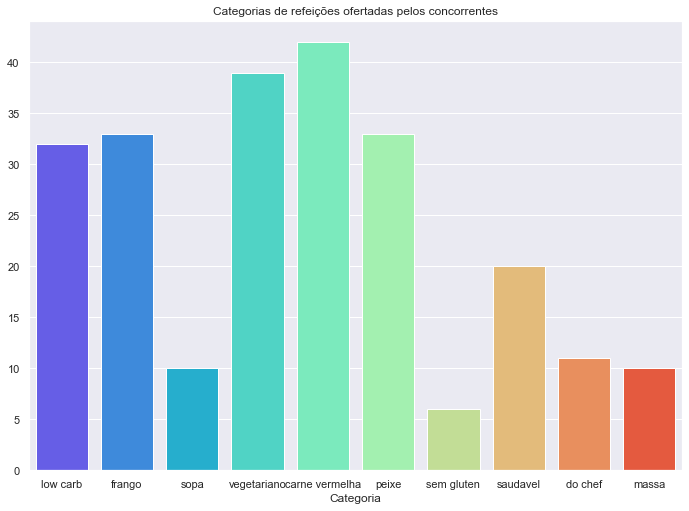

In [203]:
sns.countplot(x='Categoria',data=concorrentes2,palette='rainbow').set(
             title='Categorias de refeições ofertadas pelos concorrentes')
plt.xlabel("Categoria")
plt.ylabel("")
;

In [204]:
concorrentes2['Preço'].mode() #preço mais praticado entre todas as empresas 

0    22.9
dtype: float64

In [205]:
round(concorrentes2['Preço'].mean(),2) #média dos preços praticados entre todas as empresas

23.36

In [206]:
pratos_ingredientes_total = []

stopwords2 = ["DE", "DO", "COM", "E", "EM", "AO", "NA", "COMBO", "QUERIDINHOS(10", "PROTEÍNA(10", "PRATOS)",
             "MASSAS(12", "POUCA", "CALORIA(12", "FUTURO™", "-", "–", "320G", "300G", "150G", 
           "250G", "350G", "200G", "320G", "150G", "UNID.", "1", "150GR", "INT.", "+", "DESFIADO", "DESFIADA",
            "KIT", "(CONSULTE", "DISPONIBILIDADE)", 
            "(04", "SALADAS)", "SEMANA", "PREMIUM", "-", "(10", "21/OUT", "REFEIÇÕES)", "(08", 
            "(SOMENTE", "PROTEÍNA)", "S/", "(02", "UNIDADES)", "FIT", "14/OUT", "A", "ALMOÇO", 
            "C/", "7", "À", "2", "-", "FALSO", "AOS", "1", "DILL", "3", 'REFOGADO', "PRATO",
             "CONGELADA", "COMIDA", "MIX", "VAPOR", "NO"]

for x in concorrentes2['Prato']:
    x = x.upper()
    x = x.split()  
    for value in x:
        if value not in stopwords2:
            pratos_ingredientes_total.append(value) 

In [207]:
print(pratos_ingredientes_total)

['CARNE', 'PANELA', 'CERVEJA', 'PURÊ', 'MANDIOQUINHA', 'CARNE', 'PANELA', 'CERVEJA', 'LEGUMES', 'PATINHO', 'VAGEM', 'PATINHO', 'BRÓCOLIS', 'SALMÃO', 'PURÊ', 'MANDIOQUINHA', 'FRANGO', 'PURÊ', 'MANDIOQUINHA', 'FRANGO', 'BRÓCOLIS', 'FRANGO', 'LEGUMES', 'FRANGO', 'CUBOS', 'ABOBRINHA', 'HAMBÚRGUER', 'PATINHO', 'PURÊ', 'MANDIOQUINHA', 'HAMBÚRGUER', 'FRANGO', 'BRÓCOLIS', 'BERINJELA', 'RECHEADA', 'FRANGO', 'CREME', 'RICOTA', 'TILÁPIA', 'LEGUMES', 'FILÉ', 'FRANGO', 'GRELHADO', 'PURÊ', 'MANDIOQUINHA', 'STROGONOFF', 'FUNCIONAL', 'FRANGO', 'ARROZ', 'PARBOILIZADO', 'BATATA', 'DOCE', 'RÚSTICA', 'ARROZ', 'AÇAFRÃO', 'FRANGO', 'CUBOS', 'YAKISSOBA', 'MISTA', 'CARNE', 'FRANGO', 'GALINHADA', 'PANQUECA', 'INTEGRAL', 'FRANGO', 'PANQUECA', 'INTEGRAL', 'PEITO', 'PERU', 'FRANGO', 'BATATA', 'DOCE', 'FRANGO', 'PURÊ', 'MANDIOQUINHA', 'FRANGO', 'BRÓCOLIS', 'FRANGO', 'LEGUMES', 'FRANGO', 'PURÊ', 'BATATA', 'DOCE', 'BRÓCOLIS', 'FRANGO', 'CUBOS', 'ABOBRINHA', 'HAMBÚRGUER', 'FRANGO', 'BRÓCOLIS', 'BERINJELA', 'RECHEADA'

In [208]:
def count_freq(list_str):
    token = [t for each_line in list_str for t in each_line.split(" ")]
    count_token = [token.count(i) for i in list(set(token))]
    term_freq_dict = dict(zip(set(token),count_token))
    return(term_freq_dict)

In [209]:
frequencia_tags2 = count_freq(pratos_ingredientes_total)

In [210]:
tagfreq2 = pd.DataFrame.from_dict(frequencia_tags2, orient = "index", 
                                  columns = ["Frequência"]).sort_values("Frequência", ascending = False)

tagfreq2.head(10) #top 10 ingredientes

,Frequência
ARROZ,140
FRANGO,101
INTEGRAL,86
LEGUMES,78
BATATA,74
MOLHO,64
CARNE,53
PURÊ,49
BRÓCOLIS,48
MANDIOQUINHA,42


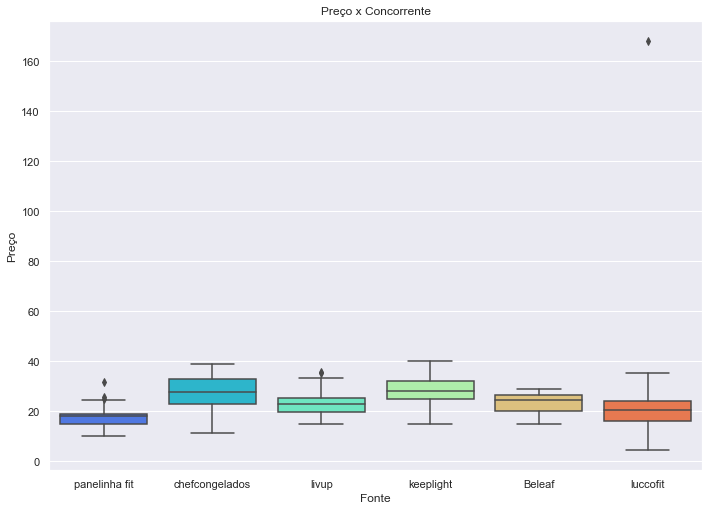

In [211]:
sns.boxplot(x="Fonte", y="Preço", data=concorrentes2,palette='rainbow').set_title('Preço x Concorrente')

plt.xlabel("Fonte")
plt.ylabel("Preço");

In [212]:
concorrentes2[concorrentes2['Preço']>160] #desconiderar, porque se trata de um kit

,Preço,Prato,Categoria,Peso,Fonte
405,168.0,KIT DIETA LÍQUIDA 2 DIAS,NaN,1.0,luccofit


In [213]:
concorrentes2.drop([405], axis=0, inplace = True)

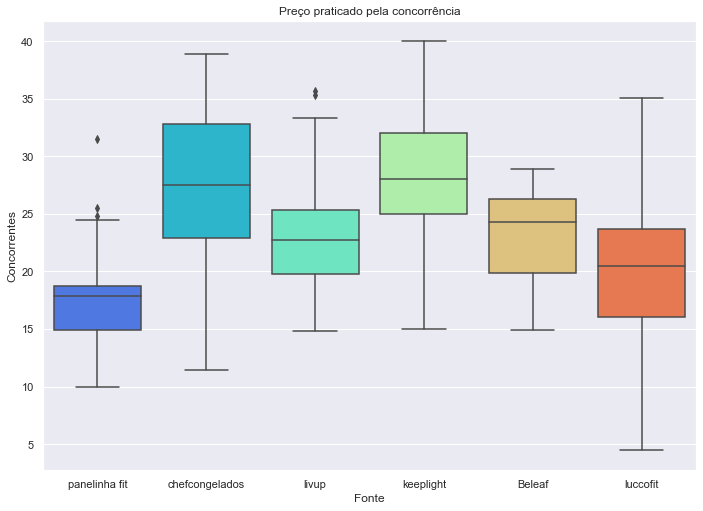

In [214]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x="Fonte", y="Preço", data=concorrentes2,palette='rainbow').set_title('Preço praticado pela concorrência')

plt.xlabel("Fonte")
plt.ylabel("Concorrentes");

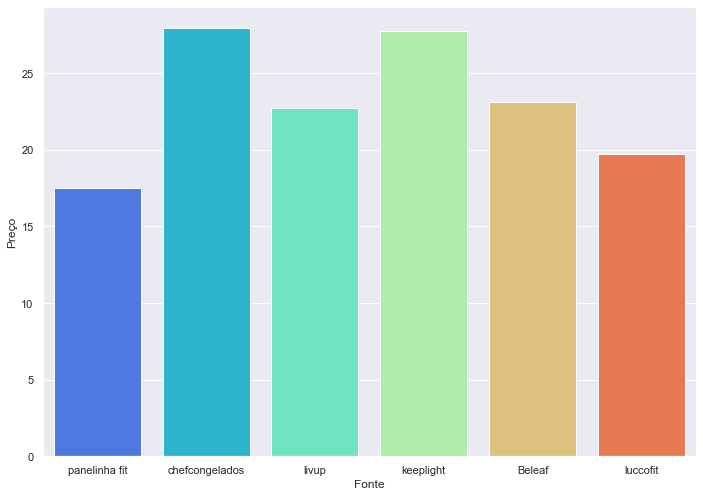

In [215]:
sns.barplot(x='Fonte',y='Preço',data=concorrentes2,palette='rainbow',ci=None);

In [216]:
concorrentes2['Fonte'].value_counts()

livup             106
luccofit           91
chefcongelados     70
keeplight          65
panelinha fit      60
Beleaf             20
Name: Fonte, dtype: int64

''

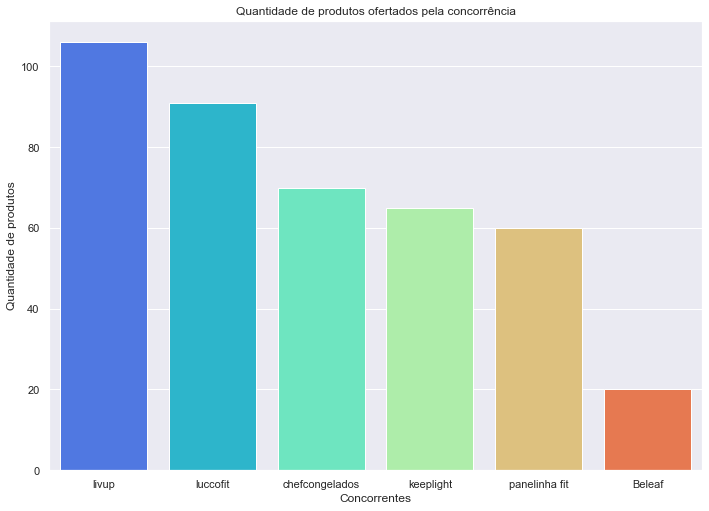

In [217]:
sns.countplot(x='Fonte',data=concorrentes2, palette='rainbow',
              order=['livup','luccofit','chefcongelados','keeplight','panelinha fit','Beleaf']).set_title(
    'Quantidade de produtos ofertados pela concorrência')

plt.xlabel("Concorrentes")
plt.ylabel("Quantidade de produtos");
;

In [218]:
#Livup: 388.4 mil seguidores no instagram
#nota 4.5/5 no facebook
mask1 = concorrentes2["Fonte"] =='livup'
livup=concorrentes2[mask1]

In [219]:
livup.head()

,Preço,Prato,Categoria,Peso,Fonte
130,24.3,Hamburguer de fraldinha batata assada com lemo...,carne vermelha,320.0,livup
131,21.3,Almondega de carne com molho de tomate arroz d...,carne vermelha,360.0,livup
132,23.7,Kafta arroz de pupunha com legumes brocolis no...,carne vermelha,320.0,livup
133,22.3,File mignon suino com molho provencal risoto d...,carne vermelha,370.0,livup
134,24.3,Prato comida congelada hamburguer de fraldinha...,carne vermelha,320.0,livup


In [220]:
livup['Preço'].mode()

0    24.3
dtype: float64

In [221]:
round(livup['Preço'].mean(),2)

22.76

In [222]:
round(livup['Preço'].std(),2)

4.3

In [223]:
livup['Preço'].max()

35.7

In [224]:
livup[livup['Preço']==35.7]

,Preço,Prato,Categoria,Peso,Fonte
195,35.7,Prato comida congelada salmao arroz de couve f...,peixe,320.0,livup


In [225]:
livup['Preço'].min()

14.8

In [226]:
livup[livup['Preço']==14.8]

,Preço,Prato,Categoria,Peso,Fonte
182,14.8,Prato comida congelada nhoque de mandioquinha ...,massa,240.0,livup
184,14.8,Prato comida congelada nhoque de mandioquinha ...,massa,200.0,livup


In [227]:
#luccofit: 121.4 mil seguidores no instagram
#nota 4.8/5 no facebook
mask2 = concorrentes2["Fonte"] =='luccofit'
luccofit=concorrentes2[mask2]

In [228]:
luccofit.head()

,Preço,Prato,Categoria,Peso,Fonte
321,14.90,Quibe Recheado Com Ricota Coberto com Amêndoas...,NaN,150.0,luccofit
322,17.50,Burguer de Patinho com Purê de Mandioquinha - ...,NaN,200.0,luccofit
323,9.90,Crepioca de frango,NaN,100.0,luccofit
324,9.90,Crepioca de Marguerita,NaN,100.0,luccofit
325,16.74,Escondidinho de carne com mandioca - 250g,NaN,250.0,luccofit


In [229]:
luccofit['Preço'].mode()

0    16.0
dtype: float64

In [230]:
round(luccofit['Preço'].mean(),2)

19.73

In [231]:
round(luccofit['Preço'].std(),2)

5.59

In [232]:
luccofit['Preço'].max()

35.1

In [233]:
luccofit[luccofit['Preço']==35.1]

,Preço,Prato,Categoria,Peso,Fonte
406,35.1,Medalhão De Mignon Com Capelloni Verde Rechead...,NaN,300.0,luccofit


In [234]:
luccofit['Preço'].min()

4.5

In [235]:
luccofit[luccofit['Preço']==4.5]

,Preço,Prato,Categoria,Peso,Fonte
371,4.5,Mix Nuts - 25g,NaN,25.0,luccofit


In [236]:
concorrentes2.drop([371], axis=0, inplace = True)

In [237]:
luccofit['Preço'].min()

4.5

In [238]:
luccofit[luccofit['Preço']==9.5]

,Preço,Prato,Categoria,Peso,Fonte
357,9.5,Risoto de Frango - 150g,NaN,150.0,luccofit
358,9.5,Risoto de Shimeji - 150g,NaN,150.0,luccofit
359,9.5,Risoto ao Limone - 150g,NaN,150.0,luccofit


In [239]:
#chefcongelados: 2433 seguidores no instagram
#nota 4.4/5 no facebook
mask3 = concorrentes2["Fonte"] =='chefcongelados'
chefcongelados=concorrentes2[mask3]

In [240]:
chefcongelados.head()

,Preço,Prato,Categoria,Peso,Fonte
60,28.5,"Moqueca de Palmito Natural com Legumes, Soja M...",vegetariano,NaN,chefcongelados
61,28.5,Kibe de Abóbora e Quinua com Legumes ao Curry ...,vegetariano,NaN,chefcongelados
62,28.5,Strogonoff de Palmito e Arroz Integral com Batata,vegetariano,NaN,chefcongelados
63,28.5,Bife de Berinjela c/ Bolognesa de Lentilha e ...,vegetariano,NaN,chefcongelados
64,28.5,Escondidinho de Batata Doce e Baião de Dois,vegetariano,NaN,chefcongelados


In [241]:
chefcongelados['Preço'].mode()

0    22.9
dtype: float64

In [242]:
round(chefcongelados['Preço'].mean(),2)

27.95

In [243]:
round(chefcongelados['Preço'].std(),2)

5.42

In [244]:
chefcongelados['Preço'].max()

38.9

In [245]:
chefcongelados[chefcongelados['Preço']==38.9]

,Preço,Prato,Categoria,Peso,Fonte
101,38.9,Carne de Panela ao Molho Ferrugem Versatile,low carb,NaN,chefcongelados
102,38.9,Saint Peter à Fiorentina,low carb,NaN,chefcongelados


In [246]:
chefcongelados['Preço'].min()

11.4

In [247]:
chefcongelados[chefcongelados['Preço']==11.4]

,Preço,Prato,Categoria,Peso,Fonte
76,11.4,Torta de Frango Sem Glúten - Irani Maggiore,sem gluten,NaN,chefcongelados


In [248]:
#keeplight: 74,5 mil seguidores no instagram
#nota 4.5/5 no facebook
mask4 = concorrentes2["Fonte"] =='keeplight'
keeplight=concorrentes2[mask4]

In [249]:
keeplight.head()

,Preço,Prato,Categoria,Peso,Fonte
236,26.0,Escondidinho de Frango e Batata Doce,NaN,NaN,keeplight
237,28.0,Estrogonofe de Frango Proteico,NaN,NaN,keeplight
238,28.0,Filé de Frango com Abobrinha Proteico,NaN,NaN,keeplight
239,29.0,Frango à Caçadora,NaN,NaN,keeplight
240,29.0,Frango à Parmegiana,NaN,NaN,keeplight


In [250]:
keeplight['Preço'].mode()

0    32.0
dtype: float64

In [251]:
round(keeplight['Preço'].mean(),2)

27.78

In [252]:
round(keeplight['Preço'].std(),2)

6.17

In [253]:
keeplight['Preço'].max()

40.0

In [254]:
keeplight[keeplight['Preço']==40.0]

,Preço,Prato,Categoria,Peso,Fonte
255,40.0,Filé ao Molho Mostarda,NaN,NaN,keeplight
267,40.0,Camarão à Moda Baiana,NaN,NaN,keeplight


In [255]:
keeplight['Preço'].min()

15.0

In [256]:
keeplight[keeplight['Preço']==15.0]

,Preço,Prato,Categoria,Peso,Fonte
292,15.0,Caldinho de Feijão,NaN,NaN,keeplight
294,15.0,Caldo de Tomate,NaN,NaN,keeplight
295,15.0,Canja de Galinha,NaN,NaN,keeplight
296,15.0,Creme de Abóbora Detox,NaN,NaN,keeplight
298,15.0,Creme de Cenoura,NaN,NaN,keeplight
299,15.0,Creme de Legumes Detox,NaN,NaN,keeplight
300,15.0,Creme de Mandioquinha,NaN,NaN,keeplight


In [257]:
#panelinha fit: 125,6 mil seguidores no instagram
#nota 4.6/5 no facebook
mask5 = concorrentes2["Fonte"] =='panelinha fit'
panelinha_fit=concorrentes2[mask5]

In [258]:
panelinha_fit.head()

,Preço,Prato,Categoria,Peso,Fonte
0,20.5,Carne de Panela na cerveja + Purê de mandioquinha,low carb,0.0,panelinha fit
1,21.0,Carne de Panela na cerveja + Mix de legumes,low carb,250.0,panelinha fit
2,18.0,Patinho + Vagem,low carb,200.0,panelinha fit
3,17.9,Patinho + Brócolis,low carb,200.0,panelinha fit
4,20.5,Salmão + Purê de mandioquinha,low carb,200.0,panelinha fit


In [259]:
panelinha_fit['Preço'].mode()

0    18.5
dtype: float64

In [260]:
round(panelinha_fit['Preço'].mean(),2)

17.49

In [261]:
round(panelinha_fit['Preço'].std(),2)

3.89

In [262]:
panelinha_fit['Preço'].max()

31.5

In [263]:
panelinha_fit[panelinha_fit['Preço']==31.5]

,Preço,Prato,Categoria,Peso,Fonte
53,31.5,Medalhão de filé mignon ao molho de chimichurr...,carne vermelha,320.0,panelinha fit


In [264]:
panelinha_fit['Preço'].min()

10.0

In [265]:
panelinha_fit[panelinha_fit['Preço']==10.0]

,Preço,Prato,Categoria,Peso,Fonte
18,10.0,Panqueca integral de frango,frango,150.0,panelinha fit


In [266]:
#Beleaf: 41.3 mil seguidores no instagram
#nota 4.9/5 no facebook
mask6 = concorrentes2["Fonte"] =='Beleaf'
beleaf=concorrentes2[mask6]

In [267]:
beleaf.head()

,Preço,Prato,Categoria,Peso,Fonte
301,19.9,"BURRITO BOWL + Milho verde, tomate, cenoura e ...",NaN,NaN,Beleaf
302,19.9,ASIA WOK + Molho de laranja e arroz de jasmim,NaN,NaN,Beleaf
303,19.9,TUTU MINEIRO DE FEIJÃO PRETO + Molho acebolado...,NaN,NaN,Beleaf
304,28.9,LASANHA BOLONHESA DO FUTURO™ + Mussarela de ca...,NaN,NaN,Beleaf
305,26.3,NHOQUE DE BATATAS COM SHIITAKE E ESPINAFRE + M...,NaN,NaN,Beleaf


In [268]:
beleaf['Preço'].mode()

0    26.3
dtype: float64

In [269]:
round(beleaf['Preço'].mean(),2)

23.12

In [270]:
round(beleaf['Preço'].std(),2)

4.43

In [271]:
beleaf['Preço'].max()

28.9

In [272]:
beleaf[beleaf['Preço']==28.9]

,Preço,Prato,Categoria,Peso,Fonte
304,28.9,LASANHA BOLONHESA DO FUTURO™ + Mussarela de ca...,NaN,NaN,Beleaf


In [273]:
beleaf['Preço'].min()

14.9

In [274]:
beleaf[beleaf['Preço']==14.9]

,Preço,Prato,Categoria,Peso,Fonte
309,14.9,MINESTRONE + Espinafre refogado,NaN,NaN,Beleaf
310,14.9,CREME DE CENOURA E MANDIOQUINHA + Castanha do ...,NaN,NaN,Beleaf
311,14.9,CREME DE ABÓBORA E CHIA + Sour cream de coco e...,NaN,NaN,Beleaf


In [275]:
#Analisando concorrentes diretos:

In [276]:
mask_conc1=concorrentes2['Fonte']=='livup'
mask_conc2=concorrentes2['Fonte']=='luccofit'
mask_conc3=concorrentes2['Fonte']=='panelinha fit'
concorrentes_diretos= concorrentes2[mask_conc1 | mask_conc2 | mask_conc3]

In [277]:
concorrentes_diretos

,Preço,Prato,Categoria,Peso,Fonte
0,20.5,Carne de Panela na cerveja + Purê de mandioquinha,low carb,0.0,panelinha fit
1,21.0,Carne de Panela na cerveja + Mix de legumes,low carb,250.0,panelinha fit
2,18.0,Patinho + Vagem,low carb,200.0,panelinha fit
3,17.9,Patinho + Brócolis,low carb,200.0,panelinha fit
4,20.5,Salmão + Purê de mandioquinha,low carb,200.0,panelinha fit
5,13.5,Frango desfiado + purê de mandioquinha,low carb,200.0,panelinha fit
6,13.9,Frango desfiado + Brócolis,low carb,200.0,panelinha fit
7,14.0,Frango desfiado + Mix de legumes,low carb,200.0,panelinha fit
8,17.0,Frango em cubos + abobrinha,low carb,200.0,panelinha fit
9,18.5,Hambúrguer de patinho + Purê de mandioquinha,low carb,200.0,panelinha fit


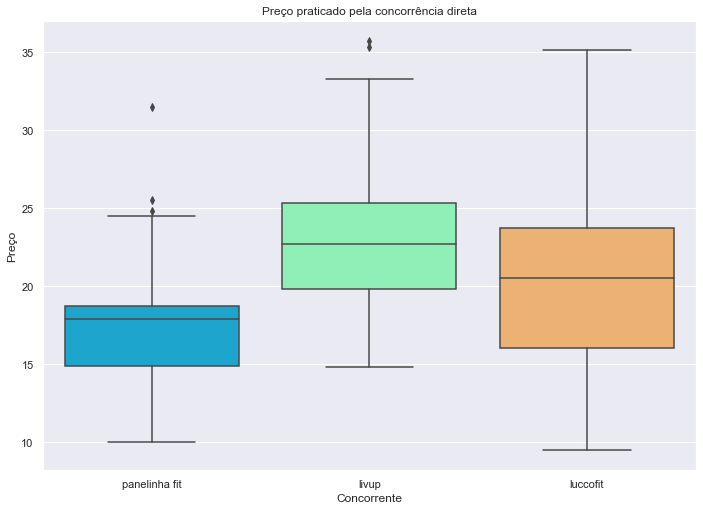

In [278]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x="Fonte", y="Preço", data=concorrentes_diretos,palette='rainbow').set_title('Preço praticado pela concorrência direta')

plt.xlabel("Concorrente")
plt.ylabel("Preço");